# **1. Cargar los datos**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. Estandarización de bases de datos**

A. Formato BIDS eye-tracking

In [ ]:
import os
import shutil

folders = {
    "/content/drive/MyDrive/Eye tracking Project/2. Eye Tracking Analisis de Datos/3. UNIVERSITARIOS/1. AGRESIVOS",
    "/content/drive/MyDrive/Eye tracking Project/2. Eye Tracking Analisis de Datos/3. UNIVERSITARIOS/2. NO AGRESIVOS",
    "/content/drive/MyDrive/Eye tracking Project/2. Eye Tracking Analisis de Datos/3. UNIVERSITARIOS/3. NEUTRO"
}

output_root = "/content/drive/MyDrive/Eye tracking Project/2. Eye Tracking Analisis de Datos/6. BASES DE DATOS FINAL_ESTANDARIZADAS/1. FORMATO BIDS/ET-EmoAgg-College"

copiados = 0
errores = []

for folder_path in folders:
    for filename in os.listdir(folder_path):
        if filename.endswith(".tsv") and filename.startswith("sub-"):
            try:
                subject_id = filename.split("_")[0]
                dest_dir = os.path.join(output_root, subject_id, "ses-01", "eyetracking")
                os.makedirs(dest_dir, exist_ok=True)

                src_file = os.path.join(folder_path, filename)
                dst_file = os.path.join(dest_dir, filename)

                shutil.copy2(src_file, dst_file)
                copiados += 1
            except Exception as e:
                errores.append(f"{filename}: {str(e)}")

print(f"Archivos copiados y organizados correctamente: {copiados}")

if errores:
    print("Archivos con errores:")
    for e in errores:
        print(" -", e)


Archivos copiados y organizados correctamente: 132


In [ ]:
import json
import os

output_root = "/content/drive/MyDrive/Eye tracking Project/2. Eye Tracking Analisis de Datos/6. BASES DE DATOS FINAL_ESTANDARIZADAS/1. FORMATO BIDS/ET-EmoAgg-College"

dataset_description = {
    "Name": "EyeTrackingAggressionDataset",
    "BIDSVersion": "1.8.0",
    "DatasetType": "raw",
    "Authors": ["Andrea Gabriela Barrera Campoverde, Andrea Lisseth Argudo Vasconez, Omar Santiago Alvarado Cando"],
    "Acknowledgements": "Thanks to participants and advisors involved in the aggression and eye-tracking studies.",
    "HowToAcknowledge": "Please cite the associated thesis or publication.",
    "License": "CC-BY-4.0",
    "Funding": ["Instituto de Neurociencias-Universidad Católica de Cuenca"]
}

with open(os.path.join(output_root, "dataset_description.json"), "w") as f:
    json.dump(dataset_description, f, indent=4)

print("dataset_description.json creado.")


dataset_description.json creado.


In [ ]:
import pandas as pd
import json
import os

output_root = "/content/drive/MyDrive/Eye tracking Project/2. Eye Tracking Analisis de Datos/6. BASES DE DATOS FINAL_ESTANDARIZADAS/1. FORMATO BIDS/ET-EmoAgg-College"

data = [
    ("sub-001", "aggressive", "very_high"), ("sub-002", "aggressive", "very_high"), ("sub-003", "aggressive", "high"),
    ("sub-004", "aggressive", "high"), ("sub-005", "aggressive", "high"), ("sub-006", "aggressive", "high"),
    ("sub-007", "aggressive", "very_high"), ("sub-008", "aggressive", "high"), ("sub-009", "aggressive", "high"),
    ("sub-010", "aggressive", "high"), ("sub-011", "aggressive", "very_high"), ("sub-012", "aggressive", "high"),
    ("sub-013", "aggressive", "high"), ("sub-014", "aggressive", "very_high"), ("sub-015", "aggressive", "very_high"),
    ("sub-016", "aggressive", "high"), ("sub-017", "aggressive", "high"), ("sub-018", "aggressive", "high"),
    ("sub-019", "aggressive", "very_high"),

    ("sub-020", "non_aggressive", "very_low"), ("sub-021", "non_aggressive", "very_low"),
    ("sub-022", "non_aggressive", "low"), ("sub-023", "non_aggressive", "low"),
    ("sub-024", "non_aggressive", "very_low"), ("sub-025", "non_aggressive", "low"),
    ("sub-026", "non_aggressive", "low"), ("sub-027", "non_aggressive", "low"),
    ("sub-028", "non_aggressive", "low"), ("sub-029", "non_aggressive", "low"),
    ("sub-030", "non_aggressive", "low"), ("sub-031", "non_aggressive", "low"),
    ("sub-032", "non_aggressive", "low"), ("sub-033", "non_aggressive", "low"),
    ("sub-034", "non_aggressive", "low"), ("sub-035", "non_aggressive", "low"),
    ("sub-036", "non_aggressive", "low"), ("sub-037", "non_aggressive", "low"),
    ("sub-038", "non_aggressive", "low"), ("sub-039", "non_aggressive", "low"),
    ("sub-040", "non_aggressive", "low"), ("sub-041", "non_aggressive", "low"),
    ("sub-042", "non_aggressive", "very_low"), ("sub-043", "non_aggressive", "low"),
    ("sub-044", "non_aggressive", "very_low"), ("sub-045", "non_aggressive", "low"),
    ("sub-046", "non_aggressive", "low"), ("sub-047", "non_aggressive", "low"),
    ("sub-048", "non_aggressive", "very_low"), ("sub-049", "non_aggressive", "very_low"),
    ("sub-050", "non_aggressive", "very_low"), ("sub-051", "non_aggressive", "low"),
    ("sub-052", "non_aggressive", "low"), ("sub-053", "non_aggressive", "low"),
    ("sub-054", "non_aggressive", "very_low"), ("sub-055", "non_aggressive", "low"),

    ("sub-056", "neutral", "medium"), ("sub-057", "neutral", "medium"), ("sub-058", "neutral", "medium"),
    ("sub-059", "neutral", "medium"), ("sub_060", "neutral", "medium"), ("sub-061", "neutral", "medium"),
    ("sub-062", "neutral", "medium"), ("sub-063", "neutral", "medium"), ("sub-064", "neutral", "medium"),
    ("sub-065", "neutral", "medium"), ("sub-066", "neutral", "medium")
]

df = pd.DataFrame(data, columns=["participant_id", "group", "aggression_level"])
df["age_group"] = "young_adult"
df = df[["participant_id", "age_group", "group", "aggression_level"]]
df.to_csv(os.path.join(output_root, "participants.tsv"), sep="\t", index=False)



In [ ]:
participants_json = {
    "participant_id": {
        "Description": "Unique anonymized participant ID."
    },
    "age_group": {
        "Description": "Age category of the participant.",
        "Levels": {
            "young_adult": "Participant is a university student or young adult."
        }
    },
    "group": {
        "Description": "Aggression group assignment based on behavioral criteria.",
        "Levels": {
            "aggressive": "Participant showed aggressive behavior.",
            "non_aggressive": "Participant did not show aggressive behavior.",
            "neutral": "Participant was not classified as aggressive or non-aggressive."
        }
    },
    "aggression_level": {
        "Description": "Detailed aggression score assigned to the participant.",
        "Levels": {
            "very_high": "Very high aggression level",
            "high": "High aggression level",
            "medium": "Medium aggression level",
            "low": "Low aggression level",
            "very_low": "Very low aggression level"
        }
    }
}

with open(os.path.join(output_root, "participants.json"), "w") as f:
    json.dump(participants_json, f, indent=4)


In [ ]:
readme_path = os.path.join(output_root, "README")
with open(readme_path, "w") as f:
    f.write(
        "This dataset contains anonymized eye-tracking data from young adults (university students).\n"
        "Participants are categorized based on behavioral aggression levels: aggressive, non_aggressive, or neutral.\n"
        "Visual stimuli were presented using standardized emotional image sets (e.g., IAPS and OASIS).\n"
        "Each subject folder follows the BIDS specification for eye-tracking experiments, including task-based data.\n"
        "Data files include gaze samples and fixation events, stored in TSV format with appropriate metadata.\n"
        "The dataset is intended for research on emotional processing, visual attention, and aggression-related behavior in young adult populations.\n"
    )
print("README created.")



README created.


In [ ]:
changes_path = os.path.join(output_root, "CHANGES")
with open(changes_path, "w") as f:
    f.write(
        "1.0.0 - Initial release\n"
        "- Anonymized and BIDS-compliant eye-tracking dataset of young adults (university students).\n"
        "- Includes aggressive, non_aggressive, and neutral groups.\n"
        "- Gaze and fixation data provided in TSV format per participant.\n"
        "- Metadata files (participants.tsv, participants.json, README, dataset_description.json) included.\n"
    )
print("CHANGES created.")



CHANGES created.


In [ ]:
import json
import os

bids_root = "/content/drive/MyDrive/Eye tracking Project/2. Eye Tracking Analisis de Datos/6. BASES DE DATOS FINAL_ESTANDARIZADAS/1. FORMATO BIDS/ET-EmoAgg-College"

column_descriptions = {
    "MEDIA_ID": {"Description": "ID of the presented media"},
    "MEDIA_NAME": {"Description": "Name of the presented media"},
    "CNT": {"Description": "Sample count"},
    "TIME(2021/12/09 14:32:51.131)": {"Description": "Absolute time stamp"},
    "TIMETICK(f=10000000)": {"Description": "Time tick from start (10Mhz ticks)"},
    "FPOGX": {"Description": "Gaze point X on screen", "Units": "normalized"},
    "FPOGY": {"Description": "Gaze point Y on screen", "Units": "normalized"},
    "FPOGS": {"Description": "Gaze point status (0=invalid, 1=valid)"},
    "FPOGD": {"Description": "Gaze point distance"},
    "FPOGID": {"Description": "Gaze point ID"},
    "FPOGV": {"Description": "Validity of gaze point"},
    "BPOGX": {"Description": "Binocular X gaze point", "Units": "normalized"},
    "BPOGY": {"Description": "Binocular Y gaze point", "Units": "normalized"},
    "BPOGV": {"Description": "Binocular gaze validity"},
    "CX": {"Description": "Custom X data"},
    "CY": {"Description": "Custom Y data"},
    "CS": {"Description": "Custom status"},
    "USER": {"Description": "User info or ID"},
    "LPCX": {"Description": "Left pupil center X"},
    "LPCY": {"Description": "Left pupil center Y"},
    "LPD": {"Description": "Left pupil diameter", "Units": "mm"},
    "LPS": {"Description": "Left pupil status"},
    "LPV": {"Description": "Left pupil validity"},
    "RPCX": {"Description": "Right pupil center X"},
    "RPCY": {"Description": "Right pupil center Y"},
    "RPD": {"Description": "Right pupil diameter", "Units": "mm"},
    "RPS": {"Description": "Right pupil status"},
    "RPV": {"Description": "Right pupil validity"},
    "BKID": {"Description": "Blink ID"},
    "BKDUR": {"Description": "Blink duration", "Units": "ms"},
    "BKPMIN": {"Description": "Blink pupil minimum"},
    "LPMM": {"Description": "Left pupil movement magnitude"},
    "LPMMV": {"Description": "Validity of LPMM"},
    "RPMM": {"Description": "Right pupil movement magnitude"},
    "RPMMV": {"Description": "Validity of RPMM"},
    "DIAL": {"Description": "Dial input"},
    "DIALV": {"Description": "Dial validity"},
    "GSR": {"Description": "Galvanic skin response"},
    "GSRV": {"Description": "GSR validity"},
    "HR": {"Description": "Heart rate"},
    "HRV": {"Description": "HR validity"},
    "HRP": {"Description": "Heart rate peak"},
    "TTL0": {"Description": "TTL channel 0"},
    "TTL1": {"Description": "TTL channel 1"},
    "TTLV": {"Description": "TTL validity"},
    "PIXS": {"Description": "Pixels stimulus on"},
    "PIXV": {"Description": "Pixels validity"},
    "AOI": {"Description": "Area of Interest (label)"},
    "SACCADE_MAG": {"Description": "Magnitude of saccade"},
    "SACCADE_DIR": {"Description": "Direction of saccade"},
    "VID_FRAME": {"Description": "Video frame number"}
}

with open(os.path.join(bids_root, "eyetrack.json"), "w") as f:
    json.dump(column_descriptions, f, indent=4)

print("General eyetrack.json created in the BIDS root.")



General eyetrack.json created in the BIDS root.


In [ ]:
bidsignore_path = "/content/drive/MyDrive/Eye tracking Project/2. Eye Tracking Analisis de Datos/6. BASES DE DATOS FINAL_ESTANDARIZADAS/1. FORMATO BIDS/ET-EmoAgg-College/.bidsignore"

with open(bidsignore_path, "w") as f:
    f.write(
        "# Ignore all eyetracking content not supported by BIDS yet\n"
        "**/eyetracking/\n"
        "*_eyetrack.tsv\n"
        "*_events.tsv\n"
        "*_eyetrack.json\n"
        "*_events.json\n"
    )

print(f".bidsignore written at: {bidsignore_path}")




.bidsignore written at: /content/drive/MyDrive/Eye tracking Project/2. Eye Tracking Analisis de Datos/6. BASES DE DATOS FINAL_ESTANDARIZADAS/1. FORMATO BIDS/ET-EmoAgg-College/.bidsignore


B. Formato tabular

In [ ]:
import pandas as pd

csv_path = "/content/drive/MyDrive/Eye tracking Project/2. Eye Tracking Analisis de Datos/3. UNIVERSITARIOS/ET_EmoAgg_college_Tab.csv"
df = pd.read_csv(csv_path)

print("Archivo cargado correctamente.")



Archivo cargado correctamente.


In [ ]:
print("Columnas:")
print(df.columns.tolist())

df.head()
df.info()
df.describe(include='all')  # Estadísticas generales

for col in df.columns:
    print(f"\nColumna: {col}")
    print(df[col].value_counts(dropna=False))


Columnas:
['Media ID', 'Media Name', 'Media Duration (sec - U=UserControlled)', 'AOI ID', 'AOI Name', 'AOI Start', 'AOI Duration (sec - U=UserControlled)', 'User ID', 'User Name', 'User Gender', 'User Age', 'Time to 1st View (sec)', 'Time Viewed (sec)', 'Time Viewed (%)', 'Fixations (#)', 'Revisits (#)', 'Clicks (#)']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5849 entries, 0 to 5848
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Media ID                                 5849 non-null   int64  
 1   Media Name                               5849 non-null   object 
 2   Media Duration (sec - U=UserControlled)  5849 non-null   float64
 3   AOI ID                                   5849 non-null   int64  
 4   AOI Name                                 5849 non-null   object 
 5   AOI Start                                5849 non-null   int64  
 6   AOI Dura

In [ ]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5849 entries, 0 to 5848
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Media ID                                 5849 non-null   int64  
 1   Media Name                               5849 non-null   object 
 2   Media Duration (sec - U=UserControlled)  5849 non-null   float64
 3   AOI ID                                   5849 non-null   int64  
 4   AOI Name                                 5849 non-null   object 
 5   AOI Start                                5849 non-null   int64  
 6   AOI Duration (sec - U=UserControlled)    5849 non-null   float64
 7   User ID                                  5849 non-null   int64  
 8   User Name                                5849 non-null   int64  
 9   User Gender                              5849 non-null   object 
 10  User Age                                 5849 no

,Media ID,Media Name,Media Duration (sec - U=UserControlled),AOI ID,AOI Name,AOI Start,AOI Duration (sec - U=UserControlled),User ID,User Name,User Gender,User Age,Time to 1st View (sec),Time Viewed (sec),Time Viewed (%),Fixations (#),Revisits (#),Clicks (#)
count,5849.000000,5849,5849.0,5849.000000,5849,5849.0,5849.0,5849.000000,5849.000000,5849,5849.0,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.0
unique,NaN,45,NaN,NaN,90,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,ESTÍMULO 2,NaN,NaN,NEGATIVA 1,NaN,NaN,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,130,NaN,NaN,65,NaN,NaN,NaN,NaN,4769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,45.207557,NaN,2.5,53.941528,NaN,0.0,2.5,52.594632,0.630706,NaN,0.0,295.017246,327.959821,35.344397,3.370662,0.315439,0.0
std,26.251252,NaN,0.0,26.781900,NaN,0.0,0.0,21.086096,0.755998,NaN,0.0,290.765942,360.884092,25.952466,1.965868,0.540275,0.0
min,1.000000,NaN,2.5,6.000000,NaN,0.0,2.5,14.000000,0.000000,NaN,0.0,-1.000000,-14.000000,-558.000000,0.000000,0.000000,0.0
25%,23.000000,NaN,2.5,32.000000,NaN,0.0,2.5,38.000000,0.000000,NaN,0.0,1.344000,1.238000,21.269000,2.000000,0.000000,0.0
50%,45.000000,NaN,2.5,55.000000,NaN,0.0,2.5,54.000000,0.000000,NaN,0.0,335.000000,140.000000,34.385000,3.000000,0.000000,0.0
75%,67.000000,NaN,2.5,77.000000,NaN,0.0,2.5,70.000000,1.000000,NaN,0.0,444.000000,679.000000,48.806000,5.000000,1.000000,0.0


In [ ]:
import numpy as np
df_clean = df.copy()

df_clean["User Age"] = np.nan
df_clean.loc[df_clean["Time to 1st View (sec)"] < 0, "Time to 1st View (sec)"] = np.nan
df_clean.loc[df_clean["Time Viewed (sec)"] < 0, "Time Viewed (sec)"] = np.nan
df_clean.loc[df_clean["Time Viewed (%)"] < 0, "Time Viewed (%)"] = np.nan

df_clean.rename(columns={"User Name": "aggressive"}, inplace=True)
df_clean.drop(columns=["Clicks (#)"], inplace=True)

df_clean.columns = [
    "media_id", "media_name", "media_duration_sec",
    "aoi_id", "aoi_name", "aoi_start", "aoi_duration_sec",
    "user_id", "aggressive", "user_gender", "user_age",
    "time_to_first_view_sec", "time_viewed_sec", "time_viewed_percent",
    "fixations", "revisits"
]

df_clean.head()

,media_id,media_name,media_duration_sec,aoi_id,aoi_name,aoi_start,aoi_duration_sec,user_id,aggressive,user_gender,user_age,time_to_first_view_sec,time_viewed_sec,time_viewed_percent,fixations,revisits
0,1,ESTÍMULO 1,2.5,6,POSITIVA 1,0,2.5,17,2,M,NaN,328.000,549.000,21.970,3.0,0
1,1,ESTÍMULO 1,2.5,6,POSITIVA 1,0,2.5,22,2,M,NaN,328.000,1.775,70.981,7.0,1
2,1,ESTÍMULO 1,2.5,6,POSITIVA 1,0,2.5,28,2,F,NaN,362.000,900.000,36.016,5.0,1
3,1,ESTÍMULO 1,2.5,6,POSITIVA 1,0,2.5,39,2,F,NaN,1.061,705.000,28.190,2.0,1
4,1,ESTÍMULO 1,2.5,6,POSITIVA 1,0,2.5,45,2,F,NaN,790.000,1.013,40.502,5.0,1


In [ ]:
import unicodedata

def clean_text(s):
    if pd.isna(s): return s
    s = unicodedata.normalize('NFKD', s).encode('ASCII', 'ignore').decode('utf-8')
    return s.lower().replace(" ", "_")

df_clean["media_name"] = df_clean["media_name"].apply(clean_text)
df_clean["aoi_name"] = df_clean["aoi_name"].apply(clean_text)


In [ ]:
print("aggressive:", df_clean["aggressive"].unique())
print("media_name:", df_clean["media_name"].unique()[:10])
print("aoi_name:", df_clean["aoi_name"].unique()[:10])


aggressive: [2 1 0]
media_name: ['estimulo_1' 'estimulo_2' 'estimulo_3' 'estimulo_4' 'estimulo_5'
 'estimulo_6' 'estimulo_7' 'estimulo_8' 'estimulo_9' 'estimulo_10']
aoi_name: ['positiva_1' 'negativa_1' 'neutra_1' 'positiva_2' 'negativa_2' 'neutra_2'
 'positiva_3' 'negativa_3' 'positiva_4' 'neutra_3']


In [ ]:
df_clean["media_name"] = df_clean["media_name"].str.replace("estimulo", "stimulus", regex=False)
df_clean["aoi_name"] = df_clean["aoi_name"]\
    .str.replace("positiva", "positive", regex=False)\
    .str.replace("negativa", "negative", regex=False)\
    .str.replace("neutra", "neutral", regex=False)


In [ ]:
categorical_cols = ["media_name", "aoi_name", "aggressive", "user_gender"]
for col in categorical_cols:
    df_clean[col] = df_clean[col].astype("category")


In [ ]:
df_clean.dtypes


,0
media_id,int64
media_name,category
media_duration_sec,float64
aoi_id,int64
aoi_name,category
aoi_start,int64
aoi_duration_sec,float64
user_id,int64
aggressive,category
user_gender,category


In [ ]:
df_clean.describe(include='all')


,media_id,media_name,media_duration_sec,aoi_id,aoi_name,aoi_start,aoi_duration_sec,user_id,aggressive,user_gender,user_age,time_to_first_view_sec,time_viewed_sec,time_viewed_percent,fixations,revisits
count,5849.000000,5849,5849.0,5849.000000,5849,5849.0,5849.0,5849.000000,5849.0,5849,0.0,5318.00000,5848.000000,5848.000000,5849.000000,5849.000000
unique,NaN,45,NaN,NaN,90,NaN,NaN,NaN,3.0,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,stimulus_10,NaN,NaN,negative_1,NaN,NaN,NaN,0.0,F,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,130,NaN,NaN,65,NaN,NaN,NaN,3150.0,4769,NaN,NaN,NaN,NaN,NaN,NaN
mean,45.207557,NaN,2.5,53.941528,NaN,0.0,2.5,52.594632,NaN,NaN,NaN,324.57444,328.018295,35.445858,3.370662,0.315439
std,26.251252,NaN,0.0,26.781900,NaN,0.0,0.0,21.086096,NaN,NaN,NaN,288.72705,360.887239,24.767392,1.965868,0.540275
min,1.000000,NaN,2.5,6.000000,NaN,0.0,2.5,14.000000,NaN,NaN,NaN,0.00000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,NaN,2.5,32.000000,NaN,0.0,2.5,38.000000,NaN,NaN,NaN,1.58900,1.238750,21.287750,2.000000,0.000000
50%,45.000000,NaN,2.5,55.000000,NaN,0.0,2.5,54.000000,NaN,NaN,NaN,360.00000,140.500000,34.385000,3.000000,0.000000
75%,67.000000,NaN,2.5,77.000000,NaN,0.0,2.5,70.000000,NaN,NaN,NaN,458.00000,679.000000,48.807500,5.000000,1.000000


In [ ]:
print("Valores únicos en 'media_duration_sec':", df_clean["media_duration_sec"].unique())
print("Valores únicos en 'aoi_duration_sec':", df_clean["aoi_duration_sec"].unique())
print("Valores únicos en 'aoi_start':", df_clean["aoi_start"].unique())
print("Valores únicos en 'user_age':", df_clean["user_age"].unique())


Valores únicos en 'media_duration_sec': [2.5]
Valores únicos en 'aoi_duration_sec': [2.5]
Valores únicos en 'aoi_start': [0]
Valores únicos en 'user_age': [nan]


In [ ]:
df_clean.drop(columns=["media_duration_sec", "aoi_duration_sec", "aoi_start", "user_age"], inplace=True)


In [ ]:
output_path = "/content/drive/MyDrive/Eye tracking Project/2. Eye Tracking Analisis de Datos/6. BASES DE DATOS FINAL_ESTANDARIZADAS/2. FORMATO TABULAR/ET_EmoAgg_College_Tab_.csv"
df_clean.to_csv(output_path, index=False)
print("Archivo limpio guardado en:", output_path)


Archivo limpio guardado en: /content/drive/MyDrive/Eye tracking Project/2. Eye Tracking Analisis de Datos/6. BASES DE DATOS FINAL_ESTANDARIZADAS/2. FORMATO TABULAR/ET_EmoAgg_College_Tab_.csv


In [ ]:
readme_text = """
ET-EmoAgg-Youth_Tab_CLEAN

This dataset contains preprocessed and anonymized eye-tracking data from young adults (university students).
Each row corresponds to metrics extracted from a specific Area of Interest (AOI) viewed by a participant during a given stimulus.

Aggression level is categorized as: 'aggressive', 'non_aggressive', or 'neutral'.

Stimuli are images labeled as 'stimulus_X'.
AOIs are labeled as 'positive_X', 'negative_X', or 'neutral_X'.

The dataset was cleaned and standardized for machine learning tasks (classification and clustering),
following a BIDS-style tabular structure.

Column descriptions are available in 'columns_ET_EmoAgg_Youth_Tab_CLEAN.json' and 'data_dictionary.tsv'.
"""

readme_path = "/content/drive/MyDrive/Eye tracking Project/2. Eye Tracking Analisis de Datos/6. BASES DE DATOS FINAL_ESTANDARIZADAS/2. FORMATO TABULAR/ET-EmoAgg-College_Tab/README.txt"

with open(readme_path, "w") as f:
    f.write(readme_text.strip())

print("README created at:", readme_path)


README created at: /content/drive/MyDrive/Eye tracking Project/2. Eye Tracking Analisis de Datos/6. BASES DE DATOS FINAL_ESTANDARIZADAS/2. FORMATO TABULAR/ET-EmoAgg-College_Tab/README.txt


In [ ]:
columns_json = {
    "media_id": "ID of the stimulus image",
    "media_name": "Name of the stimulus image",
    "aoi_id": "ID of the Area of Interest (AOI)",
    "aoi_name": "Name or label of the AOI (e.g., positive_1)",
    "user_id": "Anonymized participant ID",
    "aggressive": "Aggression label: aggressive, non_aggressive, or neutral",
    "user_gender": "Biological sex of the participant (M or F)",
    "time_to_first_view_sec": "Time (in seconds) to first view of the AOI",
    "time_viewed_sec": "Total time (in seconds) the AOI was viewed",
    "time_viewed_percent": "Percentage of media duration that AOI was viewed",
    "fixations": "Number of fixations in the AOI",
    "revisits": "Number of revisits to the AOI after the first exit"
}

json_path = "/content/drive/MyDrive/Eye tracking Project/2. Eye Tracking Analisis de Datos/6. BASES DE DATOS FINAL_ESTANDARIZADAS/2. FORMATO TABULAR/ET-EmoAgg-College_Tab/columns.json"

with open(json_path, "w") as f:
    json.dump(columns_json, f, indent=4)

print("columns.json created at:", json_path)


columns.json created at: /content/drive/MyDrive/Eye tracking Project/2. Eye Tracking Analisis de Datos/6. BASES DE DATOS FINAL_ESTANDARIZADAS/2. FORMATO TABULAR/ET-EmoAgg-College_Tab/columns.json


In [ ]:
data_dict = {
    "media_id": "Stimulus image ID",
    "media_name": "Stimulus image name",
    "aoi_id": "AOI (Area of Interest) ID",
    "aoi_name": "AOI label (positive, negative, neutral)",
    "user_id": "Participant ID (anonymized)",
    "aggressive": "Aggression classification: aggressive / non_aggressive / neutral",
    "user_gender": "Participant's sex: M / F",
    "time_to_first_view_sec": "Time in seconds until AOI was first viewed",
    "time_viewed_sec": "Total time in seconds spent viewing the AOI",
    "time_viewed_percent": "Percentage of time AOI was viewed relative to stimulus duration",
    "fixations": "Number of fixations within AOI",
    "revisits": "Number of revisits to the AOI"
}

df_dict = pd.DataFrame(list(data_dict.items()), columns=["column_name", "description"])
dict_path = "/content/drive/MyDrive/Eye tracking Project/2. Eye Tracking Analisis de Datos/6. BASES DE DATOS FINAL_ESTANDARIZADAS/2. FORMATO TABULAR/ET-EmoAgg-College_Tab/data_dictionary.tsv"
df_dict.to_csv(dict_path, sep="\t", index=False)

print("Data dictionary saved at:", dict_path)


Data dictionary saved at: /content/drive/MyDrive/Eye tracking Project/2. Eye Tracking Analisis de Datos/6. BASES DE DATOS FINAL_ESTANDARIZADAS/2. FORMATO TABULAR/ET-EmoAgg-College_Tab/data_dictionary.tsv


# **3. Preprocesamiento de los datos**

In [ ]:
csv_path = "/content/drive/MyDrive/Eye tracking Project/2. Eye Tracking Analisis de Datos/6. BASES DE DATOS FINAL_ESTANDARIZADAS/2. FORMATO TABULAR/ET-EmoAgg-College_Tab/ET_EmoAgg_College_Tab_.csv"

df = pd.read_csv(csv_path)

In [ ]:
print("Columnas categóricas:")
print(df.select_dtypes(include=["object", "category"]).columns.tolist())

print("\nColumnas numéricas:")
print(df.select_dtypes(include=["int64", "float64"]).columns.tolist())


Columnas categóricas:
['media_name', 'aoi_name', 'user_gender']

Columnas numéricas:
['media_id', 'aoi_id', 'user_id', 'aggressive', 'time_to_first_view_sec', 'time_viewed_sec', 'time_viewed_percent', 'fixations', 'revisits']


In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

le_media = LabelEncoder()
le_aoi = LabelEncoder()
le_gender = LabelEncoder()

df_encoded["media_name"] = le_media.fit_transform(df_encoded["media_name"])
df_encoded["aoi_name"] = le_aoi.fit_transform(df_encoded["aoi_name"])
df_encoded["user_gender"] = le_gender.fit_transform(df_encoded["user_gender"])

df_encoded.head()



,media_id,media_name,aoi_id,aoi_name,user_id,aggressive,user_gender,time_to_first_view_sec,time_viewed_sec,time_viewed_percent,fixations,revisits
0,1,0,6,60,17,2,1,328.000,549.000,21.970,3.0,0
1,1,0,6,60,22,2,1,328.000,1.775,70.981,7.0,1
2,1,0,6,60,28,2,0,362.000,900.000,36.016,5.0,1
3,1,0,6,60,39,2,0,1.061,705.000,28.190,2.0,1
4,1,0,6,60,45,2,0,790.000,1.013,40.502,5.0,1


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

csv_path = "/content/drive/MyDrive/Eye tracking Project/2. Eye Tracking Analisis de Datos/6. BASES DE DATOS FINAL_ESTANDARIZADAS/2. FORMATO TABULAR/ET-EmoAgg-College_Tab/ET_EmoAgg_College_Tab_.csv"

df = pd.read_csv(csv_path)

# Eliminar clase 2 (neutrales)
df_filtered = df[df["aggressive"] != 2].reset_index(drop=True)

columns_to_scale = [
    "time_to_first_view_sec",
    "time_viewed_sec",
    "time_viewed_percent",
    "fixations",
    "revisits"
]

scaler = StandardScaler()
df_filtered[columns_to_scale] = scaler.fit_transform(df_filtered[columns_to_scale])

output_path = csv_path.replace(".csv", "_NO_NEUTRAL_SCALED.csv")
df_filtered.to_csv(output_path, index=False)

print("Archivo normalizado y sin neutros guardado en:", output_path)


Archivo normalizado y sin neutros guardado en: /content/drive/MyDrive/Eye tracking Project/2. Eye Tracking Analisis de Datos/6. BASES DE DATOS FINAL_ESTANDARIZADAS/2. FORMATO TABULAR/ET-EmoAgg-College_Tab/ET_EmoAgg_College_Tab__NO_NEUTRAL_SCALED.csv


# **4. EDA**

In [ ]:
import pandas as pd

path = "/content/drive/MyDrive/Eye tracking Project/2. Eye Tracking Analisis de Datos/6. BASES DE DATOS FINAL_ESTANDARIZADAS/2. FORMATO TABULAR/ET-EmoAgg-College_Tab/ET_EmoAgg_College_Tab__NO_NEUTRAL_SCALED.csv"
df = pd.read_csv(path)

print(df.shape)
print(df.dtypes)
df.head()


(4859, 12)
media_id                    int64
media_name                 object
aoi_id                      int64
aoi_name                   object
user_id                     int64
aggressive                  int64
user_gender                object
time_to_first_view_sec    float64
time_viewed_sec           float64
time_viewed_percent       float64
fixations                 float64
revisits                  float64
dtype: object


,media_id,media_name,aoi_id,aoi_name,user_id,aggressive,user_gender,time_to_first_view_sec,time_viewed_sec,time_viewed_percent,fixations,revisits
0,1,stimulus_1,6,positive_1,14,1,F,0.129593,-0.882286,0.317742,1.328959,1.275121
1,1,stimulus_1,6,positive_1,15,1,M,0.268635,-0.880916,1.070273,-0.173580,1.275121
2,1,stimulus_1,6,positive_1,19,1,F,0.084404,-0.882079,0.431520,0.327266,1.275121
3,1,stimulus_1,6,positive_1,24,1,F,0.341632,1.188207,-0.219769,0.327266,1.275121
4,1,stimulus_1,6,positive_1,27,1,F,0.233874,-0.882062,0.439979,0.327266,1.275121


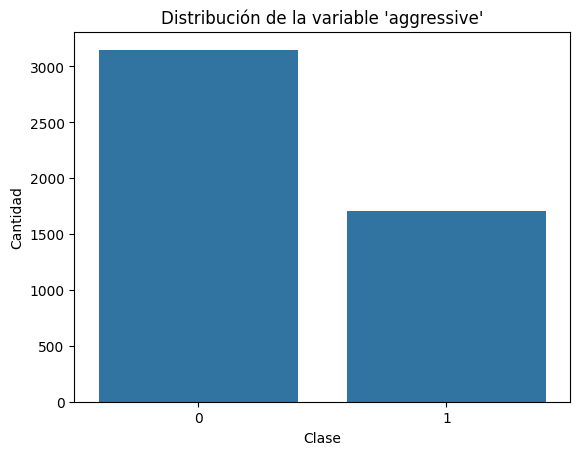

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="aggressive", data=df)
plt.title("Distribución de la variable 'aggressive'")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.show()


In [ ]:
df.groupby("aggressive")[[
    "time_to_first_view_sec",
    "time_viewed_sec",
    "time_viewed_percent",
    "fixations",
    "revisits"
]].describe().T



aggressive                              0            1
time_to_first_view_sec count  2817.000000  1553.000000
                       mean      0.014583    -0.026453
                       std       0.996219     1.006925
                       min      -1.149597    -1.149597
                       25%      -1.143754    -1.143865
                       50%       0.108736     0.105260
                       75%       0.477199     0.438962
                       max       2.319510     2.322986
time_viewed_sec        count  3150.000000  1708.000000
                       mean     -0.039863     0.073517
                       std       0.987112     1.019840
                       min      -0.885334    -0.885334
                       25%      -0.881908    -0.881892
                       50%      -0.879472    -0.304072
                       75%       0.901767     1.079220
                       max       1.906401     1.906401
time_viewed_percent    count  3150.000000  1708.000000
                       mean      0.025160    -0.046401
                       std       1.111589     0.750445
                       min      -1.360927    -1.360927
                       25%      -0.594035    -0.529648
                       50%      -0.038625    -0.060042
                       75%       0.565205     0.452322
                       max      20.594776     2.284450
fixations              count  3150.000000  1709.000000
                       mean     -0.011083     0.020428
                       std       1.024434     0.953588
                       min      -1.676119    -1.676119
                       25%      -0.674426    -0.674426
                       50%      -0.173580    -0.173580
                       75%       0.828113     0.828113
                       max       4.834883     4.334037
revisits               count  3150.000000  1709.000000
                       mean     -0.028518     0.052564
                       std       0.978419     1.037123
                       min      -0.577140    -0.577140
                       25%      -0.577140    -0.577140
                       50%      -0.577140    -0.577140
                       75%       1.275121     1.275121
                       max       8.684168     6.831906

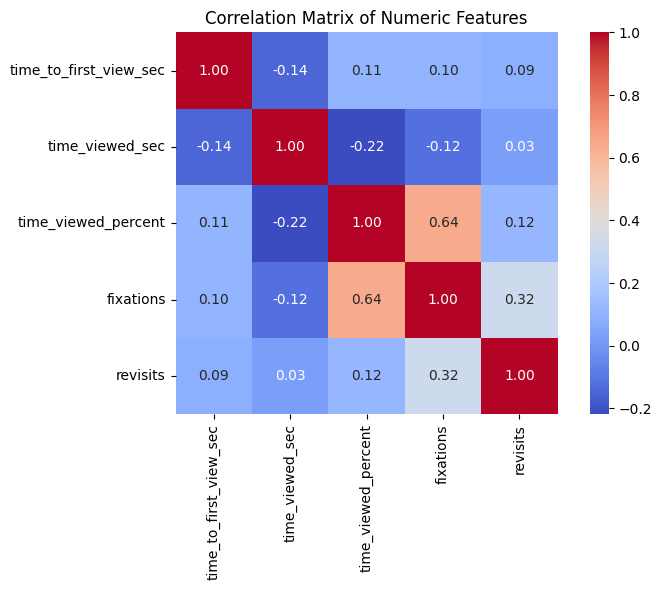

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = [
    "time_to_first_view_sec",
    "time_viewed_sec",
    "time_viewed_percent",
    "fixations",
    "revisits"
]

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()


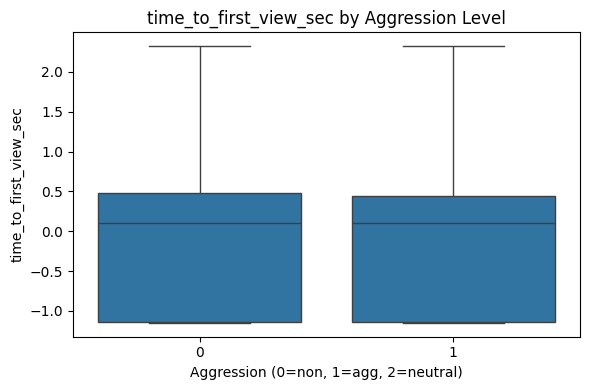

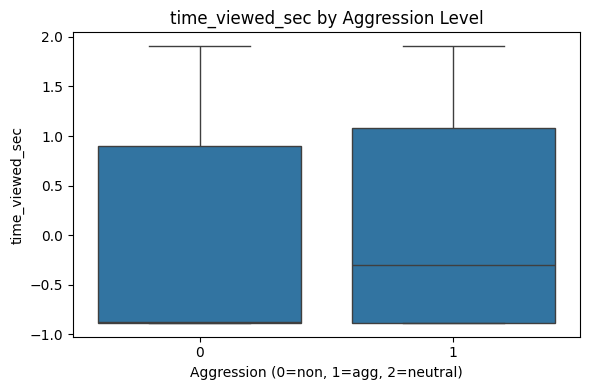

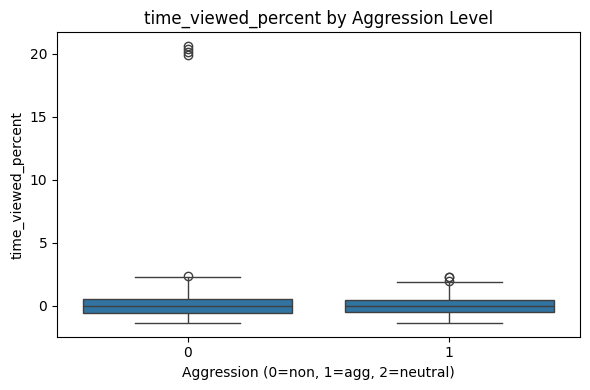

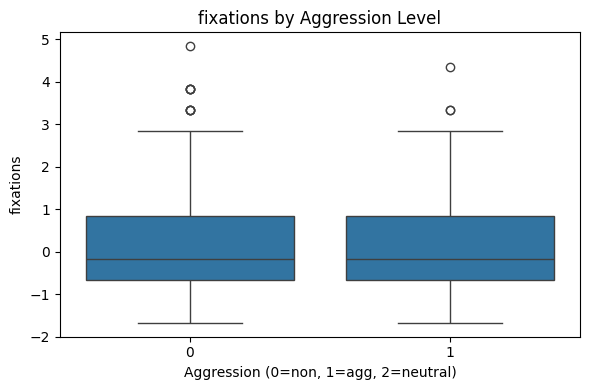

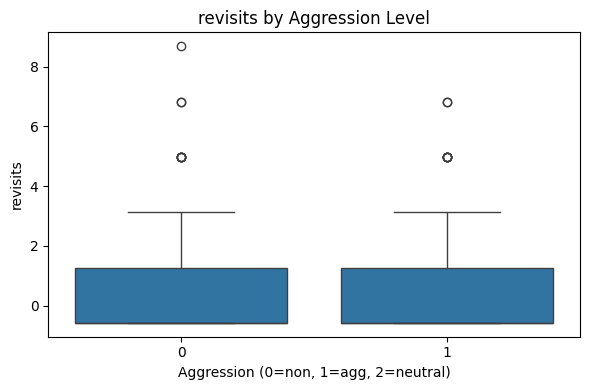

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

features = [
    "time_to_first_view_sec",
    "time_viewed_sec",
    "time_viewed_percent",
    "fixations",
    "revisits"
]

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="aggressive", y=feature, data=df)
    plt.title(f"{feature} by Aggression Level")
    plt.xlabel("Aggression (0=non, 1=agg, 2=neutral)")
    plt.tight_layout()
    plt.show()


In [ ]:
features = [
    "time_to_first_view_sec",
    "time_viewed_sec",
    "time_viewed_percent",
    "fixations",
    "revisits"
]

for feature in features:
    print(f"\n--- {feature} ---")
    stats = df.groupby("aggressive")[feature].describe()[["count", "mean", "std", "25%", "50%", "75%"]]
    print(stats)



--- time_to_first_view_sec ---
             count      mean       std       25%       50%       75%
aggressive                                                          
0           2817.0  0.014583  0.996219 -1.143754  0.108736  0.477199
1           1553.0 -0.026453  1.006925 -1.143865  0.105260  0.438962

--- time_viewed_sec ---
             count      mean       std       25%       50%       75%
aggressive                                                          
0           3150.0 -0.039863  0.987112 -0.881908 -0.879472  0.901767
1           1708.0  0.073517  1.019840 -0.881892 -0.304072  1.079220

--- time_viewed_percent ---
             count      mean       std       25%       50%       75%
aggressive                                                          
0           3150.0  0.025160  1.111589 -0.594035 -0.038625  0.565205
1           1708.0 -0.046401  0.750445 -0.529648 -0.060042  0.452322

--- fixations ---
             count      mean       std       25%      50%       75%

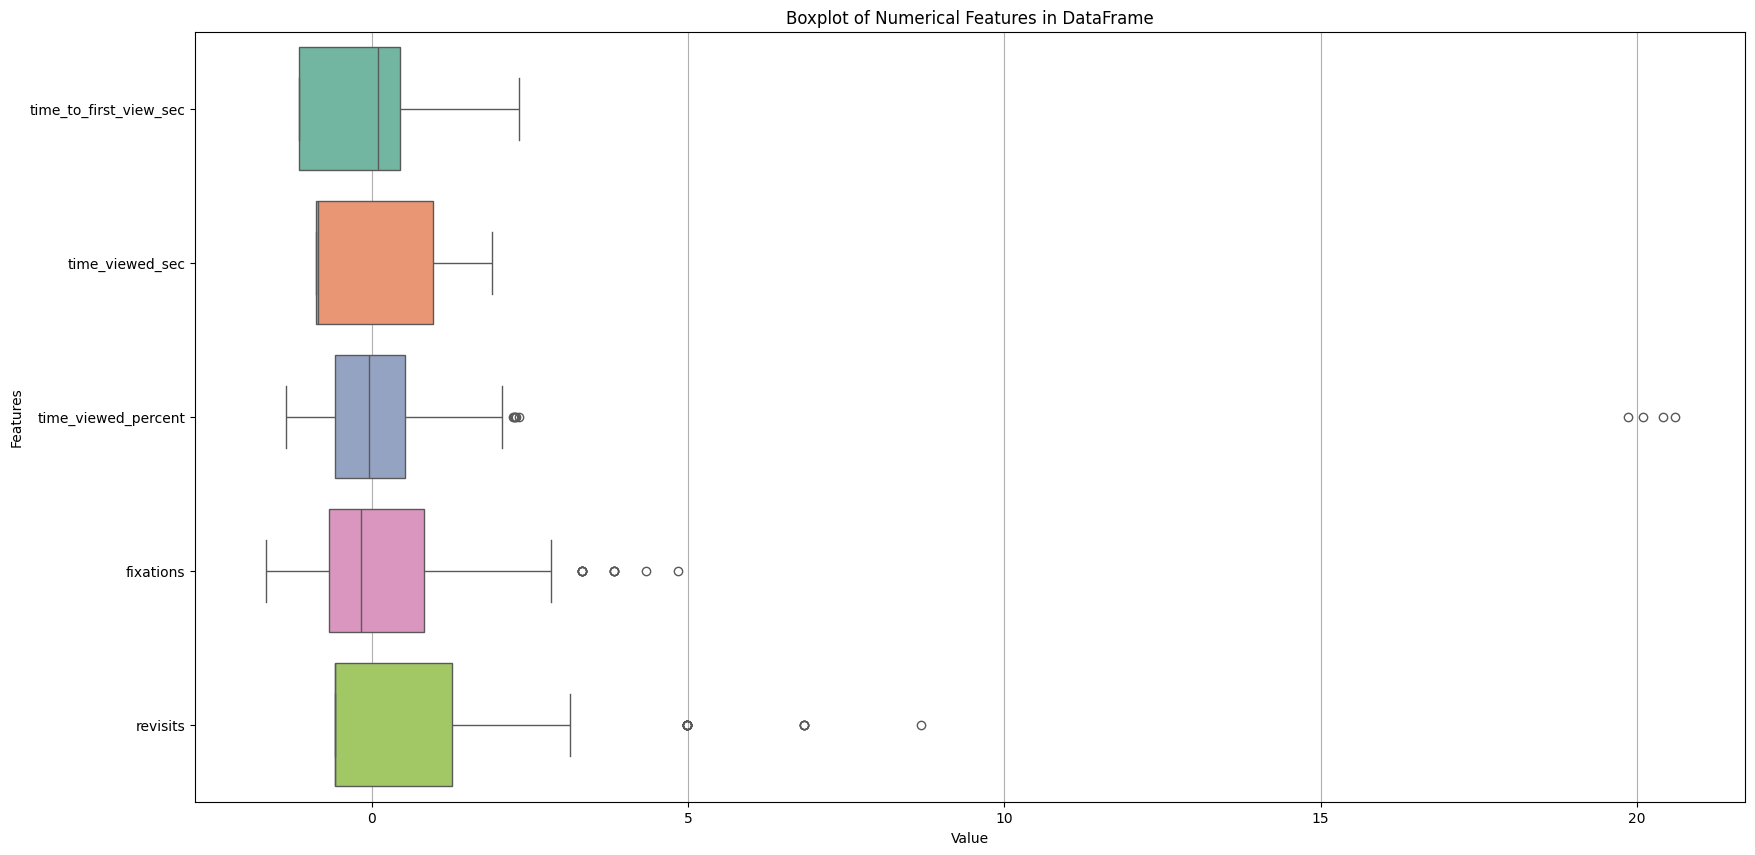

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

eigenvalue_columns = ["time_to_first_view_sec",
    "time_viewed_sec",
    "time_viewed_percent",
    "fixations",
    "revisits"]
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[eigenvalue_columns], orient="h", palette="Set2")
plt.title("Boxplot of Numerical Features in DataFrame")
plt.xlabel("Value")
plt.ylabel("Features")
plt.grid(axis='x')
plt.show()


# **5. Modelado**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import numpy as np

# === CARGAR Y FILTRAR NEUTROS ===
path = "/content/drive/MyDrive/Eye tracking Project/2. Eye Tracking Analisis de Datos/6. BASES DE DATOS FINAL_ESTANDARIZADAS/2. FORMATO TABULAR/ET-EmoAgg-College_Tab/ET_EmoAgg_College_Tab__NO_NEUTRAL_SCALED.csv"
df = pd.read_csv(path)
df = df[df["aggressive"] != 2].reset_index(drop=True)

# === ETIQUETAS CATEGÓRICAS A NÚMEROS ===
df_encoded = df.copy()
for col in ["media_name", "aoi_name", "user_gender"]:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# === IMPUTAR NaNs CON LA MEDIA ===
imputer = SimpleImputer(strategy="mean")
X_full = df_encoded.drop("aggressive", axis=1)
y_full = df_encoded["aggressive"]
X_imputed = imputer.fit_transform(X_full)

# ======================================================
# MODELO 1: Todas las características (sin balanceo)
# ======================================================
X1 = X_imputed
y1 = y_full

# ======================================================
# MODELO 2: Con SMOTE aplicado para balancear las clases
# ======================================================
smote = SMOTE(random_state=42)
X2, y2 = smote.fit_resample(X1, y1)

# ======================================================
# MODELO 3: Con reducción de dimensionalidad PCA (95% varianza)
# ======================================================
pca = PCA(n_components=0.95, random_state=42)
X3 = pca.fit_transform(X1)
y3 = y1

# ======================================================
# MODELO 4: Con selección de características por importancia (Random Forest)
# ======================================================
rf = RandomForestClassifier(random_state=42)
rf.fit(X1, y1)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = X_full.columns[indices[:5]]
X4 = pd.DataFrame(X1, columns=X_full.columns)[top_features]
y4 = y1
# ======================================================
# MODELO 5: Random Forest + Feature Selection + SMOTE
# ======================================================
# Usar mismas top_features que en Modelo 4
X5_base = pd.DataFrame(X1, columns=X_full.columns)[top_features]
y5_base = y1

# Aplicar SMOTE sobre las features seleccionadas
X5, y5 = smote.fit_resample(X5_base, y5_base)



# **6. Modelos supervisados**

Regresion logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

modelos = {
    "Modelo 1 - Original": (X1, y1),
    "Modelo 2 - SMOTE": (X2, y2),
    "Modelo 3 - PCA": (X3, y3),
    "Modelo 4 - Feature Selection": (X4, y4),
    "Modelo 5 - RF + FS + SMOTE": (X5, y5)
}

for nombre, (X, y) in modelos.items():
    print(f"\n=== {nombre} ===")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    clf = LogisticRegression(max_iter=1000, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=3))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



=== Modelo 1 - Original ===
Classification Report:
              precision    recall  f1-score   support

           0      0.653     0.954     0.775       630
           1      0.431     0.064     0.112       342

    accuracy                          0.641       972
   macro avg      0.542     0.509     0.443       972
weighted avg      0.575     0.641     0.542       972

Confusion Matrix:
[[601  29]
 [320  22]]

=== Modelo 2 - SMOTE ===
Classification Report:
              precision    recall  f1-score   support

           0      0.583     0.598     0.590       630
           1      0.587     0.571     0.579       630

    accuracy                          0.585      1260
   macro avg      0.585     0.585     0.585      1260
weighted avg      0.585     0.585     0.585      1260

Confusion Matrix:
[[377 253]
 [270 360]]

=== Modelo 3 - PCA ===
Classification Report:
              precision    recall  f1-score   support

           0      0.648     1.000     0.787       630
       

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
              precision    recall  f1-score   support

           0      0.651     0.997     0.787       630
           1      0.714     0.015     0.029       342

    accuracy                          0.651       972
   macro avg      0.683     0.506     0.408       972
weighted avg      0.673     0.651     0.520       972

Confusion Matrix:
[[628   2]
 [337   5]]

=== Modelo 5 - RF + FS + SMOTE ===
Classification Report:
              precision    recall  f1-score   support

           0      0.555     0.552     0.554       630
           1      0.555     0.557     0.556       630

    accuracy                          0.555      1260
   macro avg      0.555     0.555     0.555      1260
weighted avg      0.555     0.555     0.555      1260

Confusion Matrix:
[[348 282]
 [279 351]]


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

modelos = {
    "Modelo 1 - Original": (X1, y1),
    "Modelo 2 - SMOTE": (X2, y2),
    "Modelo 3 - PCA": (X3, y3),
    "Modelo 4 - Feature Selection": (X4, y4),
    "Modelo 5 - RF + FS + SMOTE": (X5, y5)
}

for nombre, (X, y) in modelos.items():
    print(f"\n=== {nombre} ===")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    clf = GaussianNB()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=3))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))






=== Modelo 1 - Original ===
Classification Report:
              precision    recall  f1-score   support

           0      0.675     0.795     0.730       630
           1      0.439     0.295     0.353       342

    accuracy                          0.619       972
   macro avg      0.557     0.545     0.542       972
weighted avg      0.592     0.619     0.598       972

Confusion Matrix:
[[501 129]
 [241 101]]

=== Modelo 2 - SMOTE ===
Classification Report:
              precision    recall  f1-score   support

           0      0.580     0.473     0.521       630
           1      0.555     0.657     0.602       630

    accuracy                          0.565      1260
   macro avg      0.567     0.565     0.561      1260
weighted avg      0.567     0.565     0.561      1260

Confusion Matrix:
[[298 332]
 [216 414]]

=== Modelo 3 - PCA ===
Classification Report:
              precision    recall  f1-score   support

           0      0.667     0.930     0.777       630
       

Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

modelos = {
    "Modelo 1 - Original": (X1, y1),
    "Modelo 2 - SMOTE": (X2, y2),
    "Modelo 3 - PCA": (X3, y3),
    "Modelo 4 - Feature Selection": (X4, y4),
    "Modelo 5 - RF + FS + SMOTE": (X5, y5)
}

for nombre, (X, y) in modelos.items():
    print(f"\n=== {nombre} ===")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=3))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))




=== Modelo 1 - Original ===
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       630
           1      1.000     1.000     1.000       342

    accuracy                          1.000       972
   macro avg      1.000     1.000     1.000       972
weighted avg      1.000     1.000     1.000       972

Confusion Matrix:
[[630   0]
 [  0 342]]

=== Modelo 2 - SMOTE ===
Classification Report:
              precision    recall  f1-score   support

           0      0.992     0.984     0.988       630
           1      0.984     0.992     0.988       630

    accuracy                          0.988      1260
   macro avg      0.988     0.988     0.988      1260
weighted avg      0.988     0.988     0.988      1260

Confusion Matrix:
[[620  10]
 [  5 625]]

=== Modelo 3 - PCA ===
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       630
       

Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

modelos = {
    "Modelo 1 - Original": (X1, y1),
    "Modelo 2 - SMOTE": (X2, y2),
    "Modelo 3 - PCA": (X3, y3),
    "Modelo 4 - Feature Selection": (X4, y4),
    "Modelo 5 - RF + FS + SMOTE": (X5, y5)
}

for nombre, (X, y) in modelos.items():
    print(f"\n=== {nombre} ===")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=3))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))




=== Modelo 1 - Original ===
Classification Report:
              precision    recall  f1-score   support

           0      0.871     0.973     0.919       630
           1      0.937     0.734     0.823       342

    accuracy                          0.889       972
   macro avg      0.904     0.853     0.871       972
weighted avg      0.894     0.889     0.885       972

Confusion Matrix:
[[613  17]
 [ 91 251]]

=== Modelo 2 - SMOTE ===
Classification Report:
              precision    recall  f1-score   support

           0      0.924     0.949     0.937       630
           1      0.948     0.922     0.935       630

    accuracy                          0.936      1260
   macro avg      0.936     0.936     0.936      1260
weighted avg      0.936     0.936     0.936      1260

Confusion Matrix:
[[598  32]
 [ 49 581]]

=== Modelo 3 - PCA ===
Classification Report:
              precision    recall  f1-score   support

           0      0.994     0.998     0.996       630
       

Support vector machine

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

modelos = {
    "Modelo 1 - Original": (X1, y1),
    "Modelo 2 - SMOTE": (X2, y2),
    "Modelo 3 - PCA": (X3, y3),
    "Modelo 4 - Feature Selection": (X4, y4),
    "Modelo 5 - RF + FS + SMOTE": (X5, y5)
}

for nombre, (X, y) in modelos.items():
    print(f"\n=== {nombre} ===")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    clf = SVC(kernel="rbf", probability=True, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=3))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



=== Modelo 1 - Original ===
Classification Report:
              precision    recall  f1-score   support

           0      0.648     1.000     0.787       630
           1      0.000     0.000     0.000       342

    accuracy                          0.648       972
   macro avg      0.324     0.500     0.393       972
weighted avg      0.420     0.648     0.510       972

Confusion Matrix:
[[630   0]
 [342   0]]

=== Modelo 2 - SMOTE ===


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
              precision    recall  f1-score   support

           0      0.529     0.800     0.637       630
           1      0.590     0.287     0.386       630

    accuracy                          0.544      1260
   macro avg      0.559     0.544     0.512      1260
weighted avg      0.559     0.544     0.512      1260

Confusion Matrix:
[[504 126]
 [449 181]]

=== Modelo 3 - PCA ===
Classification Report:
              precision    recall  f1-score   support

           0      0.648     1.000     0.787       630
           1      0.000     0.000     0.000       342

    accuracy                          0.648       972
   macro avg      0.324     0.500     0.393       972
weighted avg      0.420     0.648     0.510       972

Confusion Matrix:
[[630   0]
 [342   0]]

=== Modelo 4 - Feature Selection ===


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
              precision    recall  f1-score   support

           0      0.648     1.000     0.787       630
           1      0.000     0.000     0.000       342

    accuracy                          0.648       972
   macro avg      0.324     0.500     0.393       972
weighted avg      0.420     0.648     0.510       972

Confusion Matrix:
[[630   0]
 [342   0]]

=== Modelo 5 - RF + FS + SMOTE ===


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
              precision    recall  f1-score   support

           0      0.551     0.648     0.595       630
           1      0.572     0.471     0.517       630

    accuracy                          0.560      1260
   macro avg      0.561     0.560     0.556      1260
weighted avg      0.561     0.560     0.556      1260

Confusion Matrix:
[[408 222]
 [333 297]]


Perceptrón multicapa

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

modelos = {
    "Modelo 1 - Original": (X1, y1),
    "Modelo 2 - SMOTE": (X2, y2),
    "Modelo 3 - PCA": (X3, y3),
    "Modelo 4 - Feature Selection": (X4, y4),
    "Modelo 5 - RF + FS + SMOTE": (X5, y5)
}

for nombre, (X, y) in modelos.items():
    print(f"\n=== {nombre} ===")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=3))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



=== Modelo 1 - Original ===
Classification Report:
              precision    recall  f1-score   support

           0      0.656     0.967     0.782       630
           1      0.523     0.067     0.119       342

    accuracy                          0.650       972
   macro avg      0.589     0.517     0.450       972
weighted avg      0.609     0.650     0.549       972

Confusion Matrix:
[[609  21]
 [319  23]]

=== Modelo 2 - SMOTE ===
Classification Report:
              precision    recall  f1-score   support

           0      0.561     0.522     0.541       630
           1      0.553     0.592     0.572       630

    accuracy                          0.557      1260
   macro avg      0.557     0.557     0.557      1260
weighted avg      0.557     0.557     0.557      1260

Confusion Matrix:
[[329 301]
 [257 373]]

=== Modelo 3 - PCA ===
Classification Report:
              precision    recall  f1-score   support

           0      0.660     0.892     0.758       630
       

# **7. MODELOS SUPERVISADOS ADICIONALES**

**CATBOOST**

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.1 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix
)
import pandas as pd

modelos = {
    "Modelo 1": (X1, y1),
    "Modelo 2": (X2, y2),
    "Modelo 3": (X3, y3),
    "Modelo 4": (X4, y4),
    "Modelo 5": (X5, y5)
}

resultados = []

for nombre, (X, y) in modelos.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    clf = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, l2_leaf_reg=3, verbose=0, random_state=42)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1]

    resultados.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision_macro": precision_score(y_test, y_pred, average='macro', zero_division=0),
        "Precision_weighted": precision_score(y_test, y_pred, average='weighted', zero_division=0),
        "Recall_macro": recall_score(y_test, y_pred, average='macro'),
        "Recall_weighted": recall_score(y_test, y_pred, average='weighted'),
        "F1_macro": f1_score(y_test, y_pred, average='macro'),
        "F1_weighted": f1_score(y_test, y_pred, average='weighted'),
        "AUC": roc_auc_score(y_test, y_prob),
        "Confusion_Matrix": confusion_matrix(y_test, y_pred).tolist()
    })

df_resultados = pd.DataFrame(resultados)
print(df_resultados)



     Modelo  Accuracy  Precision_macro  Precision_weighted  Recall_macro  \
0  Modelo 1  1.000000         1.000000            1.000000      1.000000   
1  Modelo 2  0.996032         0.996063            0.996063      0.996032   
2  Modelo 3  0.996914         0.997630            0.996928      0.995614   
3  Modelo 4  1.000000         1.000000            1.000000      1.000000   
4  Modelo 5  0.999206         0.999208            0.999208      0.999206   

   Recall_weighted  F1_macro  F1_weighted       AUC      Confusion_Matrix  
0         1.000000  1.000000     1.000000  1.000000  [[630, 0], [0, 342]]  
1         0.996032  0.996032     0.996032  0.999945  [[630, 0], [5, 625]]  
2         0.996914  0.996610     0.996910  0.999935  [[630, 0], [3, 339]]  
3         1.000000  1.000000     1.000000  1.000000  [[630, 0], [0, 342]]  
4         0.999206  0.999206     0.999206  0.999912  [[630, 0], [1, 629]]  


**STACKING CLASSIFIER**

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix
)
from sklearn.model_selection import train_test_split
import pandas as pd

modelos = {
    "Modelo 1": (X1, y1),
    "Modelo 2": (X2, y2),
    "Modelo 3": (X3, y3),
    "Modelo 4": (X4, y4),
    "Modelo 5": (X5, y5)
}

resultados = []

for nombre, (X, y) in modelos.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    base_models = [
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42))
    ]

    meta_model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, l2_leaf_reg=3, verbose=0, random_state=42)

    stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
    stacking_clf.fit(X_train, y_train)

    y_pred = stacking_clf.predict(X_test)
    y_prob = stacking_clf.predict_proba(X_test)[:, 1]

    resultados.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision_macro": precision_score(y_test, y_pred, average='macro', zero_division=0),
        "Precision_weighted": precision_score(y_test, y_pred, average='weighted', zero_division=0),
        "Recall_macro": recall_score(y_test, y_pred, average='macro'),
        "Recall_weighted": recall_score(y_test, y_pred, average='weighted'),
        "F1_macro": f1_score(y_test, y_pred, average='macro'),
        "F1_weighted": f1_score(y_test, y_pred, average='weighted'),
        "AUC": roc_auc_score(y_test, y_prob),
        "Confusion_Matrix": confusion_matrix(y_test, y_pred).tolist()
    })

df_resultados_stacking = pd.DataFrame(resultados)
print(df_resultados_stacking)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

     Modelo  Accuracy  Precision_macro  Precision_weighted  Recall_macro  \
0  Modelo 1  0.897119         0.891204            0.896462      0.881203   
1  Modelo 2  0.925397         0.925551            0.925551      0.925397   
2  Modelo 3  0.995885         0.994220            0.995932      0.996825   
3  Modelo 4  0.933128         0.925150            0.933535      0.929031   
4  Modelo 5  0.949206         0.949211            0.949211      0.949206   

   Recall_weighted  F1_macro  F1_weighted       AUC        Confusion_Matrix  
0         0.897119  0.885801     0.896454  0.954978  [[589, 41], [59, 283]]  
1         0.925397  0.925390     0.925390  0.979572  [[577, 53], [41, 589]]  
2         0.995885  0.995501     0.995890  0.999870    [[626, 4], [0, 342]]  
3         0.933128  0.927029     0.933279  0.981857  [[594, 36], [29, 313]]  
4         0.949206  0.949206     0.949206  0.988990  [[597, 33], [31, 599]]  


**VOTING CLASSIFIER**

In [ ]:
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix
)
import pandas as pd

modelos = {
    "Modelo 1": (X1, y1),
    "Modelo 2": (X2, y2),
    "Modelo 3": (X3, y3),
    "Modelo 4": (X4, y4),
    "Modelo 5": (X5, y5)
}

resultados_hard = []
resultados_soft = []

for nombre, (X, y) in modelos.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    svm_model = SVC(probability=True, random_state=42)
    xgb_model = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
    gb_model = GradientBoostingClassifier(random_state=42)
    rf_model = RandomForestClassifier(random_state=42)

    hard_voting_clf = VotingClassifier(estimators=[
        ('svm', svm_model),
        ('xgb', xgb_model),
        ('gb', gb_model),
        ('rf', rf_model)
    ], voting='hard')

    soft_voting_clf = VotingClassifier(estimators=[
        ('svm', svm_model),
        ('xgb', xgb_model),
        ('gb', gb_model),
        ('rf', rf_model)
    ], voting='soft')

    hard_voting_clf.fit(X_train, y_train)
    soft_voting_clf.fit(X_train, y_train)

    y_pred_hard = hard_voting_clf.predict(X_test)
    y_pred_soft = soft_voting_clf.predict(X_test)

    rf_model.fit(X_train, y_train)
    y_prob_hard = rf_model.predict_proba(X_test)[:, 1]
    y_prob_soft = soft_voting_clf.predict_proba(X_test)[:, 1]

    resultados_hard.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, y_pred_hard),
        "Precision_macro": precision_score(y_test, y_pred_hard, average='macro', zero_division=0),
        "Precision_weighted": precision_score(y_test, y_pred_hard, average='weighted', zero_division=0),
        "Recall_macro": recall_score(y_test, y_pred_hard, average='macro'),
        "Recall_weighted": recall_score(y_test, y_pred_hard, average='weighted'),
        "F1_macro": f1_score(y_test, y_pred_hard, average='macro'),
        "F1_weighted": f1_score(y_test, y_pred_hard, average='weighted'),
        "AUC": roc_auc_score(y_test, y_prob_hard),
        "Confusion_Matrix": confusion_matrix(y_test, y_pred_hard).tolist()
    })

    resultados_soft.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, y_pred_soft),
        "Precision_macro": precision_score(y_test, y_pred_soft, average='macro', zero_division=0),
        "Precision_weighted": precision_score(y_test, y_pred_soft, average='weighted', zero_division=0),
        "Recall_macro": recall_score(y_test, y_pred_soft, average='macro'),
        "Recall_weighted": recall_score(y_test, y_pred_soft, average='weighted'),
        "F1_macro": f1_score(y_test, y_pred_soft, average='macro'),
        "F1_weighted": f1_score(y_test, y_pred_soft, average='weighted'),
        "AUC": roc_auc_score(y_test, y_prob_soft),
        "Confusion_Matrix": confusion_matrix(y_test, y_pred_soft).tolist()
    })

df_hard = pd.DataFrame(resultados_hard)
df_soft = pd.DataFrame(resultados_soft)

print("Hard Voting Results:")
print(df_hard.sort_values(by="F1_weighted", ascending=False))

print("\nSoft Voting Results:")
print(df_soft.sort_values(by="F1_weighted", ascending=False))



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:48:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:49:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:49:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:49:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:49:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Hard Voting Results:
     Modelo  Accuracy  Precision_macro  Precision_weighted  Recall_macro  \
2  Modelo 3  0.990741         0.992958            0.990871      0.986842   
4  Modelo 5  0.975397         0.976551            0.976551      0.975397   
1  Modelo 2  0.969048         0.970852            0.970852      0.969048   
3  Modelo 4  0.945473         0.961201            0.949704      0.922515   
0  Modelo 1  0.906379         0.936893            0.918195      0.866959   

   Recall_weighted  F1_macro  F1_weighted       AUC       Confusion_Matrix  
2         0.990741  0.989787     0.990712  0.999921   [[630, 0], [9, 333]]  
4         0.975397  0.975382     0.975382  0.989486  [[630, 0], [31, 599]]  
1         0.969048  0.969018     0.969018  0.980128  [[630, 0], [39, 591]]  
3         0.945473  0.937820     0.944284  0.986037  [[630, 0], [53, 289]]  
0         0.906379  0.889593     0.902348  0.956233  [[630, 0], [91, 251]]  

Soft Voting Results:
     Modelo  Accuracy  Precision_macro

# **8. Modelos no supervisados**

In [ ]:
import pandas as pd

ruta = "/content/drive/MyDrive/Eye tracking Project/2. Eye Tracking Analisis de Datos/6. BASES DE DATOS FINAL_ESTANDARIZADAS/2. FORMATO TABULAR/ET-EmoAgg-College_Tab/ET_EmoAgg_College_Tab__NO_NEUTRAL_SCALED.csv"

df = pd.read_csv(ruta)

y_true = df["aggressive"]
X_unsupervised = df.drop(columns=["aggressive"])

print("X_unsupervised shape:", X_unsupervised.shape)
print("Etiquetas únicas en y_true:", y_true.unique())


X_unsupervised shape: (4859, 11)
Etiquetas únicas en y_true: [1 0]


In [ ]:
from sklearn.preprocessing import LabelEncoder

X_clean = X_unsupervised.copy()
for col in X_clean.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_clean[col] = le.fit_transform(X_clean[col])


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X_clean)


**K-Means**

KMeans + PCA results:
ARI: -0.0002
Silhouette Score: 0.5038
NMI: 0.0000


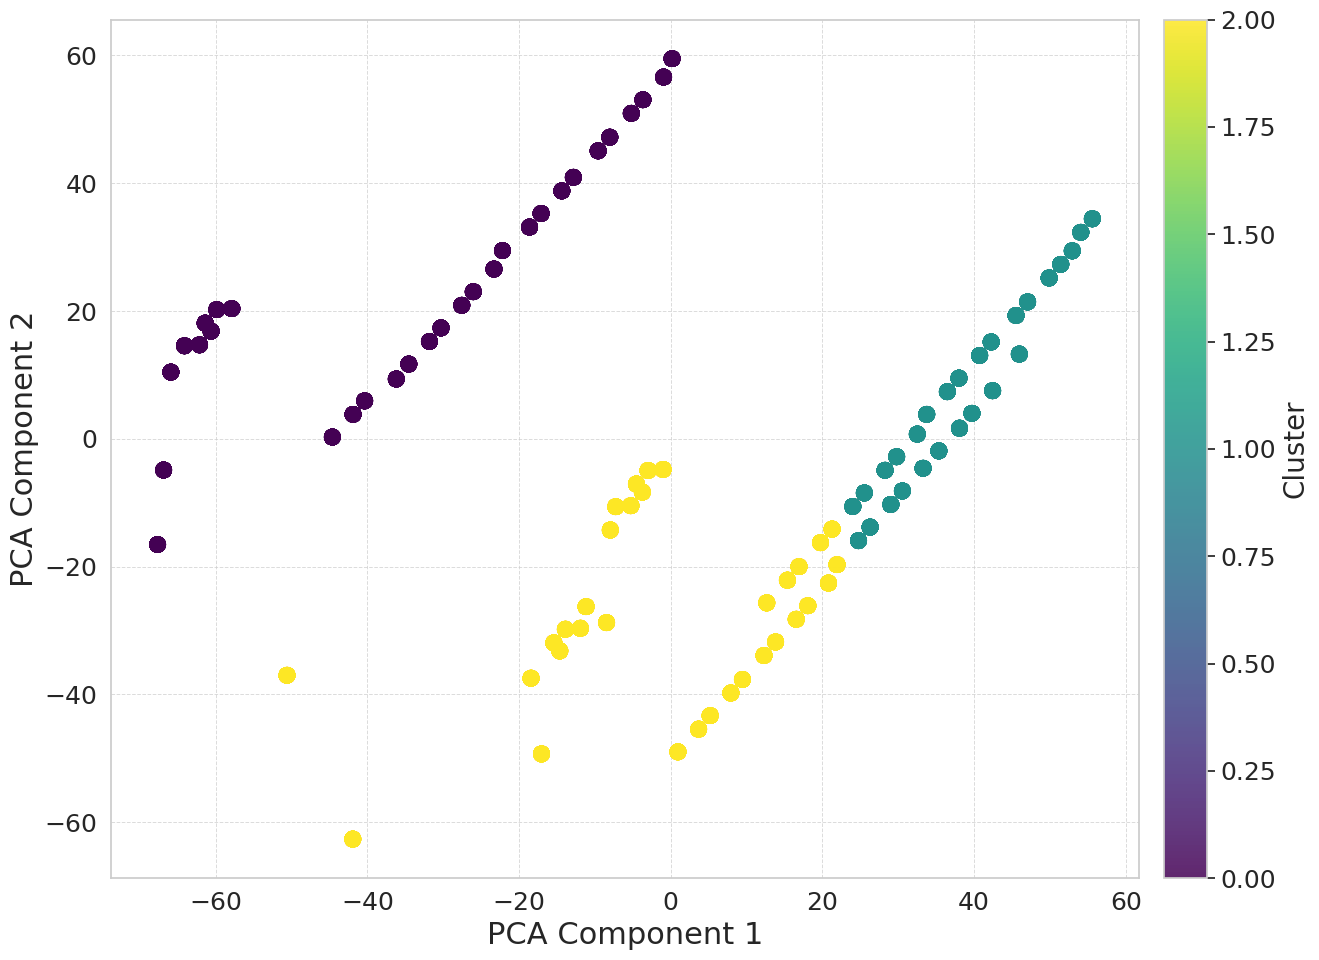

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score, normalized_mutual_info_score
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Configuración estética general
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 20})

# Preprocesamiento de datos
X_clean = X_unsupervised.copy()
for col in X_clean.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_clean[col] = le.fit_transform(X_clean[col])

imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X_clean)

# PCA para reducción de dimensionalidad
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_imputed)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Métricas
ari = adjusted_rand_score(y_true, cluster_labels)
silhouette = silhouette_score(X_pca, cluster_labels)
nmi = normalized_mutual_info_score(y_true, cluster_labels)

print("KMeans + PCA results:")
print(f"ARI: {ari:.4f}")
print(f"Silhouette Score: {silhouette:.4f}")
print(f"NMI: {nmi:.4f}")

# Crear colormap continuo (difuminado) usando colores 'muted'
palette = sns.color_palette("muted", n_colors=3)
cmap_continuo = LinearSegmentedColormap.from_list("muted_continuous", palette.as_hex())

# Gráfico mejorado
plt.figure(figsize=(14, 10))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=cluster_labels,
    cmap='viridis',
    s=120, alpha=0.85
)

plt.xlabel("PCA Component 1", fontsize=22)
plt.ylabel("PCA Component 2", fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

cbar = plt.colorbar(scatter, pad=0.02)
cbar.set_label("Cluster", fontsize=20)
cbar.ax.tick_params(labelsize=18)

plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()


TSNE+K-MEANS

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


KMeans + t-SNE results:
ARI: -0.0002
Silhouette Score: 0.4193
NMI: 0.0000


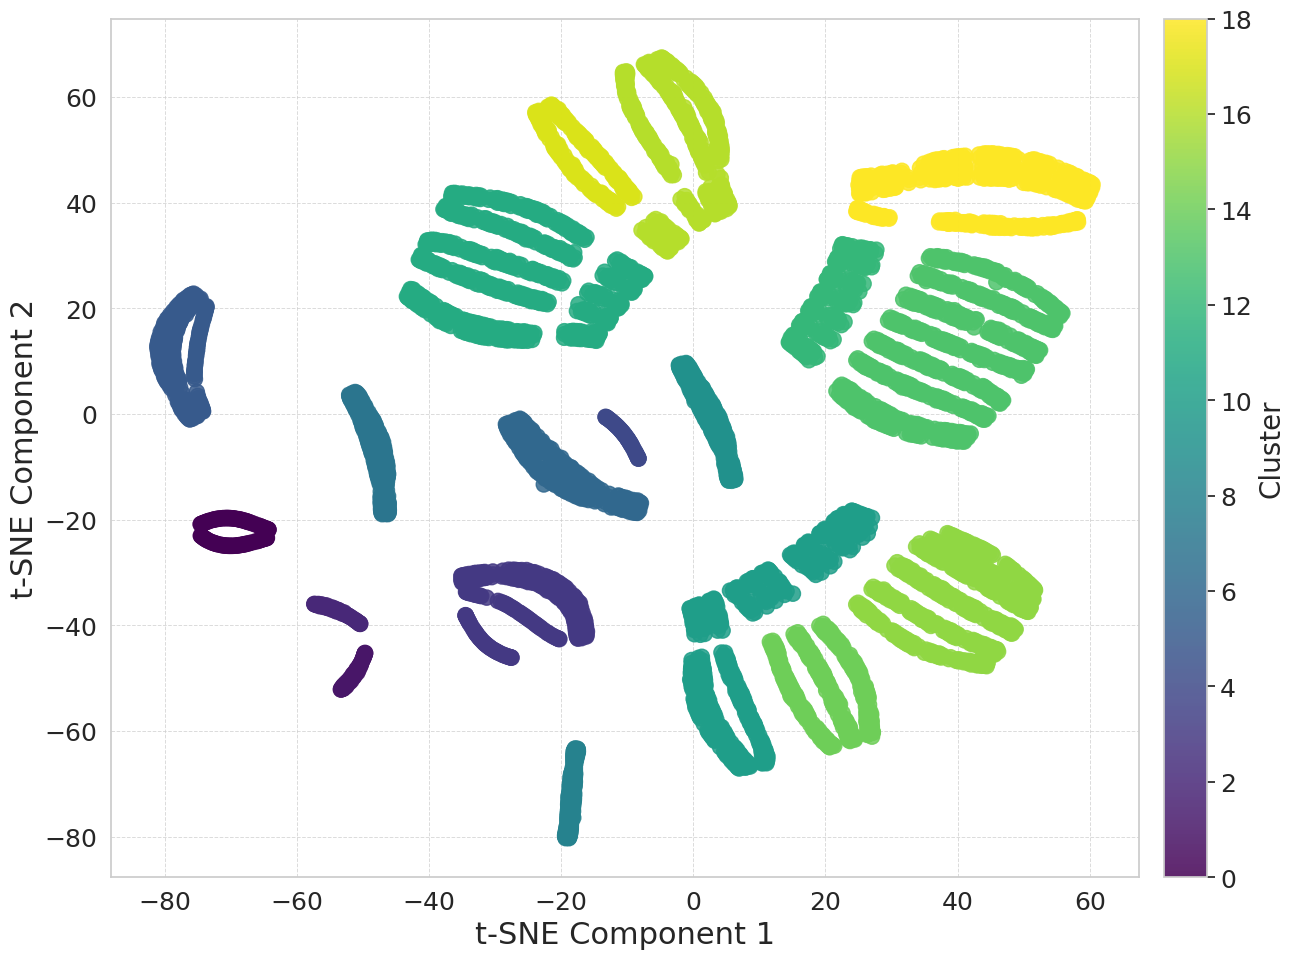

In [ ]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score, normalized_mutual_info_score
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Configuración estética
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 20})

# t-SNE transformación
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_imputed)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_tsne)

# Métricas
ari = adjusted_rand_score(y_true, cluster_labels)
silhouette = silhouette_score(X_tsne, cluster_labels)
nmi = normalized_mutual_info_score(y_true, cluster_labels)

print("KMeans + t-SNE results:")
print(f"ARI: {ari:.4f}")
print(f"Silhouette Score: {silhouette:.4f}")
print(f"NMI: {nmi:.4f}")

# Crear colormap continuo usando la paleta 'muted'
palette = sns.color_palette("muted", n_colors=3)
cmap_continuo = LinearSegmentedColormap.from_list("muted_continuous", palette.as_hex())

plt.figure(figsize=(14, 10))
scatter = plt.scatter(
    X_tsne[:, 0], X_tsne[:, 1],
    c=labels_2d,
    cmap="viridis",  # Estilo continuo degradado original
    s=120, alpha=0.85
)

plt.xlabel("t-SNE Component 1", fontsize=22)
plt.ylabel("t-SNE Component 2", fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

cbar = plt.colorbar(scatter, pad=0.02)
cbar.set_label("Cluster", fontsize=20)
cbar.ax.tick_params(labelsize=18)

plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()



/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


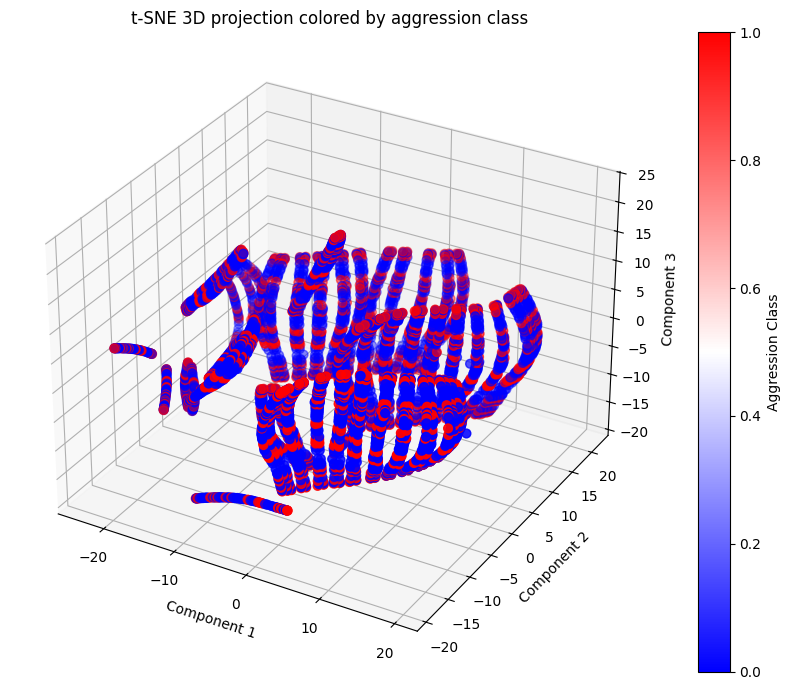

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

tsne_3d = TSNE(n_components=3, perplexity=30, n_iter=1000, random_state=42)
X_tsne_3d = tsne_3d.fit_transform(X_imputed)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2],
                c=y_true.astype(int), cmap='bwr', s=40)

ax.set_title("t-SNE 3D projection colored by aggression class")
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")
plt.colorbar(sc, label="Aggression Class")
plt.tight_layout()
plt.show()



DBSCAN

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


DBSCAN on t-SNE 2D:
ARI: 0.0001
Silhouette: 0.4218
NMI: 0.0004
Unique clusters: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18)}


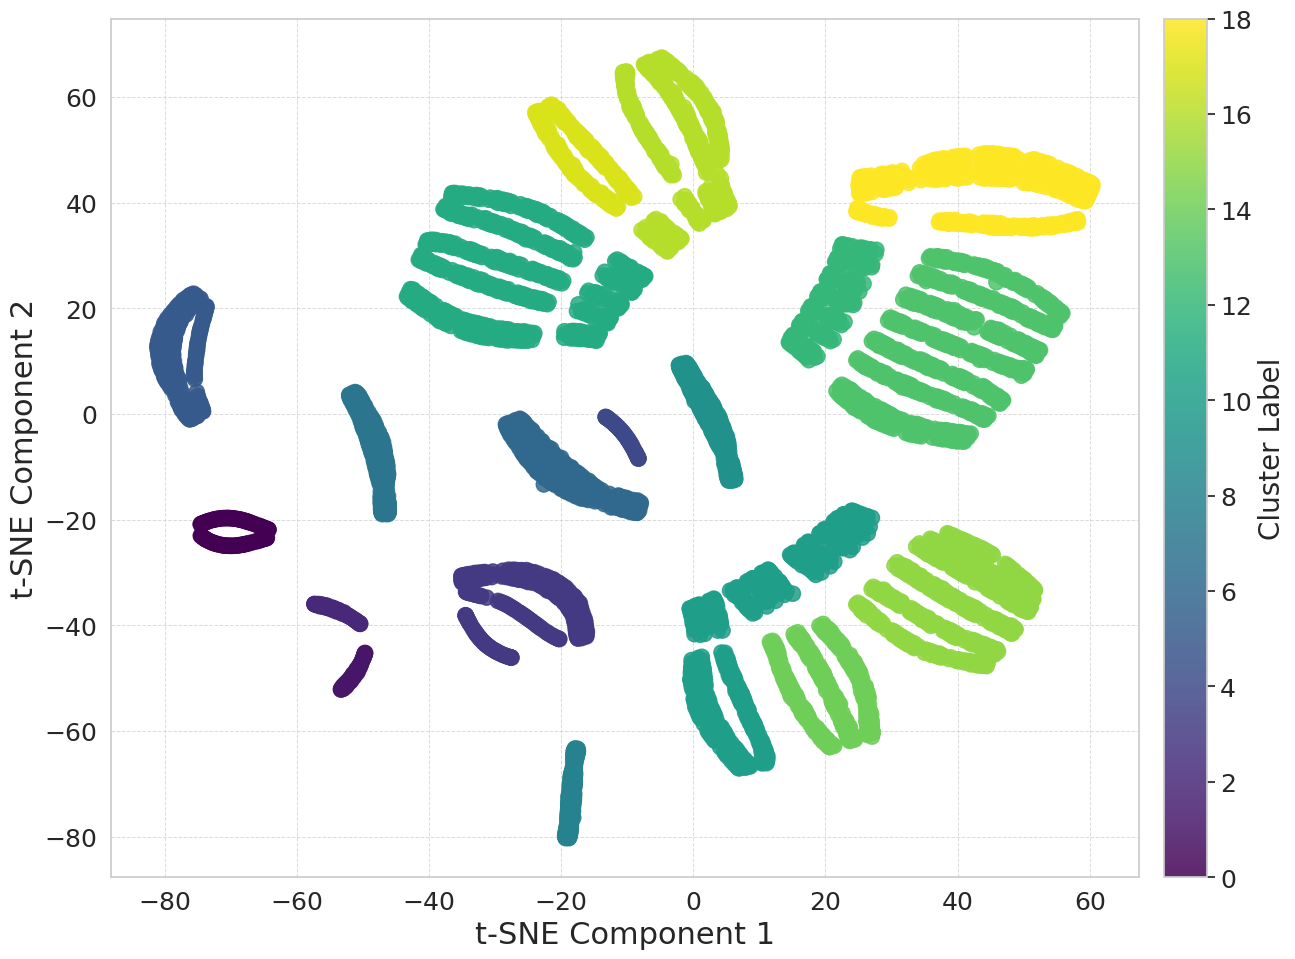

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score, normalized_mutual_info_score

# Configuración general
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 20})

# DBSCAN sobre t-SNE 2D
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_imputed)

dbscan_2d = DBSCAN(eps=5, min_samples=5)
labels_2d = dbscan_2d.fit_predict(X_tsne)

ari_2d = adjusted_rand_score(y_true, labels_2d)
silhouette_2d = silhouette_score(X_tsne, labels_2d) if len(set(labels_2d)) > 1 else -1
nmi_2d = normalized_mutual_info_score(y_true, labels_2d)

print("DBSCAN on t-SNE 2D:")
print(f"ARI: {ari_2d:.4f}")
print(f"Silhouette: {silhouette_2d:.4f}")
print(f"NMI: {nmi_2d:.4f}")
print("Unique clusters:", set(labels_2d))

# Gráfico con cmap continuo (como original)
plt.figure(figsize=(14, 10))
scatter = plt.scatter(
    X_tsne[:, 0], X_tsne[:, 1],
    c=labels_2d,
    cmap="viridis",  # Estilo continuo degradado original
    s=120, alpha=0.85
)

plt.xlabel("t-SNE Component 1", fontsize=22)
plt.ylabel("t-SNE Component 2", fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

cbar = plt.colorbar(scatter, pad=0.02)
cbar.set_label("Cluster Label", fontsize=20)
cbar.ax.tick_params(labelsize=18)

plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()


DBSCAN on t-SNE 3D:
ARI: -0.0003
Silhouette: 0.3257
NMI: 0.0000
Unique clusters: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)}


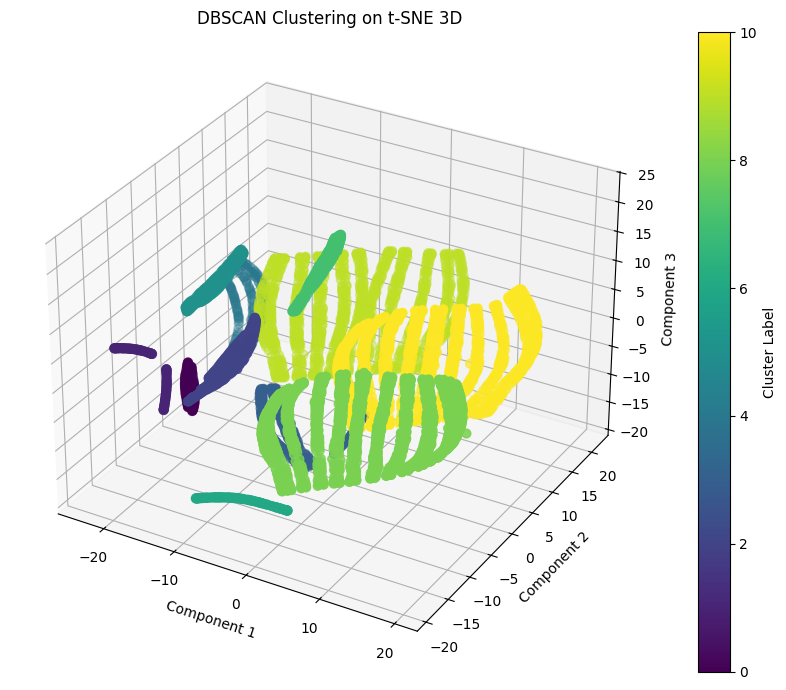

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

dbscan_3d = DBSCAN(eps=5, min_samples=5)
labels_3d = dbscan_3d.fit_predict(X_tsne_3d)

ari_3d = adjusted_rand_score(y_true, labels_3d)
silhouette_3d = silhouette_score(X_tsne_3d, labels_3d) if len(set(labels_3d)) > 1 else -1
nmi_3d = normalized_mutual_info_score(y_true, labels_3d)

print("DBSCAN on t-SNE 3D:")
print(f"ARI: {ari_3d:.4f}")
print(f"Silhouette: {silhouette_3d:.4f}")
print(f"NMI: {nmi_3d:.4f}")
print("Unique clusters:", set(labels_3d))

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], c=labels_3d, cmap='viridis', s=40)

ax.set_title("DBSCAN Clustering on t-SNE 3D")
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")
plt.colorbar(sc, label="Cluster Label")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score, normalized_mutual_info_score

# === CARGAR Y PREPROCESAR LOS DATOS ===
path = "/content/drive/MyDrive/Eye tracking Project/2. Eye Tracking Analisis de Datos/6. BASES DE DATOS FINAL_ESTANDARIZADAS/2. FORMATO TABULAR/ET-EmoAgg-College_Tab/ET_EmoAgg_College_Tab__NO_NEUTRAL_SCALED.csv"
df = pd.read_csv(path)

for col in ["media_name", "aoi_name", "user_gender"]:
    df[col] = LabelEncoder().fit_transform(df[col])

y_true = df["aggressive"].values
X = df.drop("aggressive", axis=1)

X_imputed = SimpleImputer(strategy="mean").fit_transform(X)
X_scaled = StandardScaler().fit_transform(X_imputed)

# === K-MEANS CLUSTERING ===
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# === DBSCAN CLUSTERING ===
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# === MÉTRICAS DE K-MEANS ===
kmeans_results = {
    "ARI": adjusted_rand_score(y_true, kmeans_labels),
    "Silhouette": silhouette_score(X_scaled, kmeans_labels),
    "NMI": normalized_mutual_info_score(y_true, kmeans_labels)
}

# === MÉTRICAS DE DBSCAN ===
if len(set(dbscan_labels)) > 1:
    dbscan_results = {
        "ARI": adjusted_rand_score(y_true, dbscan_labels),
        "Silhouette": silhouette_score(X_scaled, dbscan_labels),
        "NMI": normalized_mutual_info_score(y_true, dbscan_labels)
    }
else:
    dbscan_results = {
        "ARI": adjusted_rand_score(y_true, dbscan_labels),
        "Silhouette": -1,
        "NMI": normalized_mutual_info_score(y_true, dbscan_labels)
    }

print("KMeans results:", kmeans_results)
print("DBSCAN results:", dbscan_results)


KMeans results: {'ARI': -0.0007066271223022945, 'Silhouette': np.float64(0.13732385217724666), 'NMI': np.float64(8.182875325561004e-06)}
DBSCAN results: {'ARI': 0.0110936777783312, 'Silhouette': np.float64(-0.045695186067364606), 'NMI': np.float64(0.00847312554260248)}


GMM Results: {'ARI': -0.0004483553057253445, 'Silhouette': np.float64(0.13713017727429702), 'NMI': np.float64(2.133680476115949e-06)}


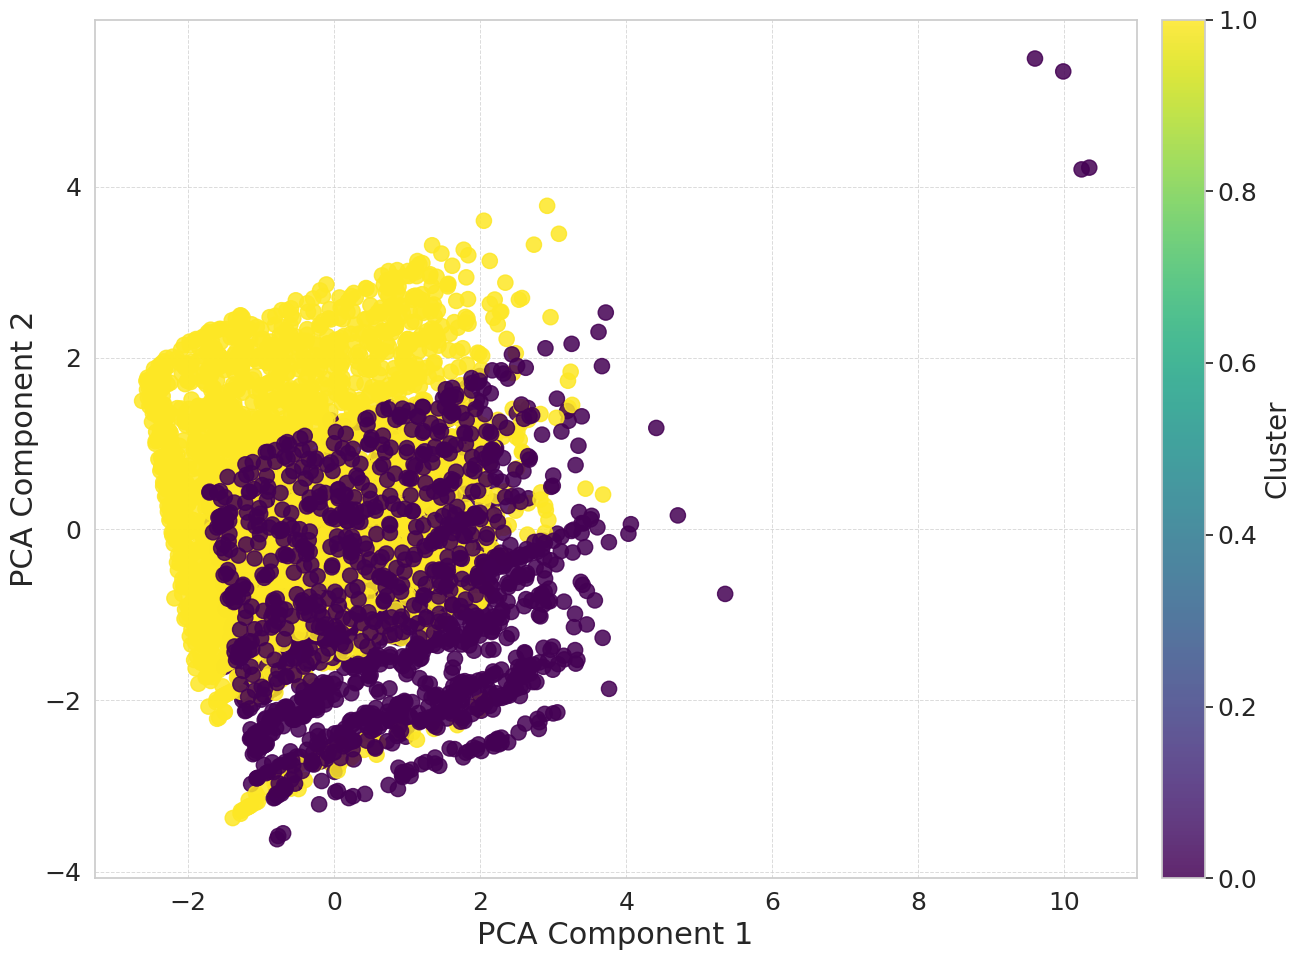

In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, silhouette_score, normalized_mutual_info_score
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Configuración estética general
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 20})

# Ajustar GMM
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Calcular métricas
gmm_metrics = {
    "ARI": adjusted_rand_score(y_true, gmm_labels),
    "Silhouette": silhouette_score(X_scaled, gmm_labels),
    "NMI": normalized_mutual_info_score(y_true, gmm_labels)
}

print("GMM Results:", gmm_metrics)

# Proyección PCA para visualización
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Crear colormap 'muted' continuo
palette = sns.color_palette("muted", n_colors=len(set(gmm_labels)))
cmap_continuo = LinearSegmentedColormap.from_list("muted_continuous", palette.as_hex())

# Gráfico
plt.figure(figsize=(14, 10))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=gmm_labels,
    cmap='viridis',
    s=120, alpha=0.85
)

plt.xlabel("PCA Component 1", fontsize=22)
plt.ylabel("PCA Component 2", fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

cbar = plt.colorbar(scatter, pad=0.02)
cbar.set_label("Cluster", fontsize=20)
cbar.ax.tick_params(labelsize=18)

plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()



GMM (3 componentes) Results: {'ARI': 0.0031266624818127647, 'Silhouette': np.float64(0.12582797502496762), 'NMI': np.float64(0.000737362452195431)}


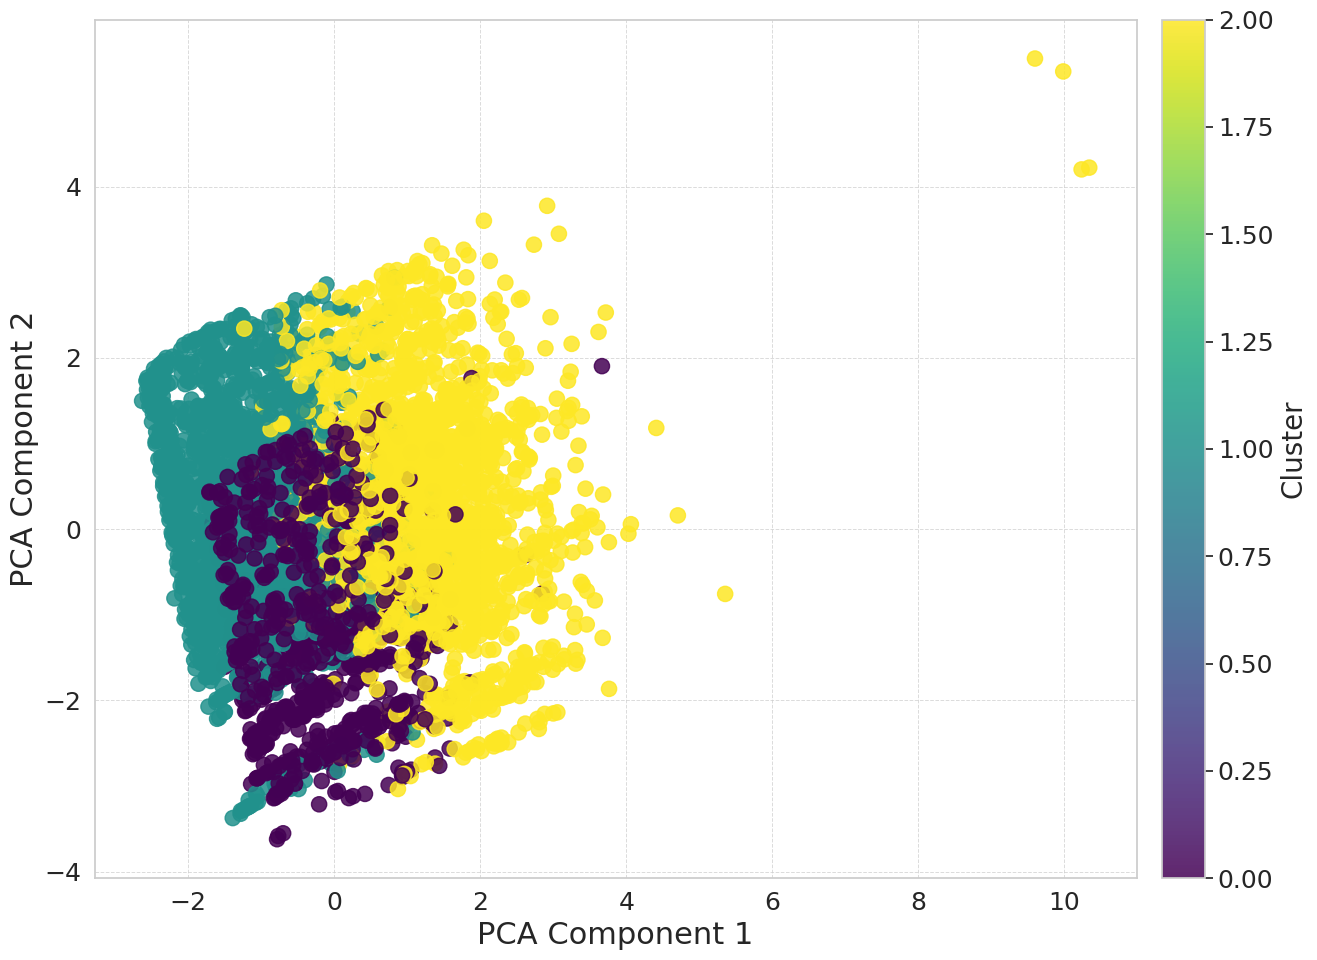

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score, normalized_mutual_info_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Configuración estética general
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 20})

# Aplicar GMM con 3 componentes
gmm3 = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm_labels_3 = gmm3.fit_predict(X_scaled)

# Métricas
gmm3_metrics = {
    "ARI": adjusted_rand_score(y_true, gmm_labels_3),
    "Silhouette": silhouette_score(X_scaled, gmm_labels_3),
    "NMI": normalized_mutual_info_score(y_true, gmm_labels_3)
}
print("GMM (3 componentes) Results:", gmm3_metrics)

# PCA para proyección 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Colormap 'muted' continuo
palette = sns.color_palette("muted", n_colors=len(set(gmm_labels_3)))
cmap_continuo = LinearSegmentedColormap.from_list("muted_continuous", palette.as_hex())

# Gráfico
plt.figure(figsize=(14, 10))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=gmm_labels_3,
    cmap='viridis',
    s=120, alpha=0.85
)

plt.xlabel("PCA Component 1", fontsize=22)
plt.ylabel("PCA Component 2", fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

cbar = plt.colorbar(scatter, pad=0.02)
cbar.set_label("Cluster", fontsize=20)
cbar.ax.tick_params(labelsize=18)

plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()



# **9. RESULTADOS**

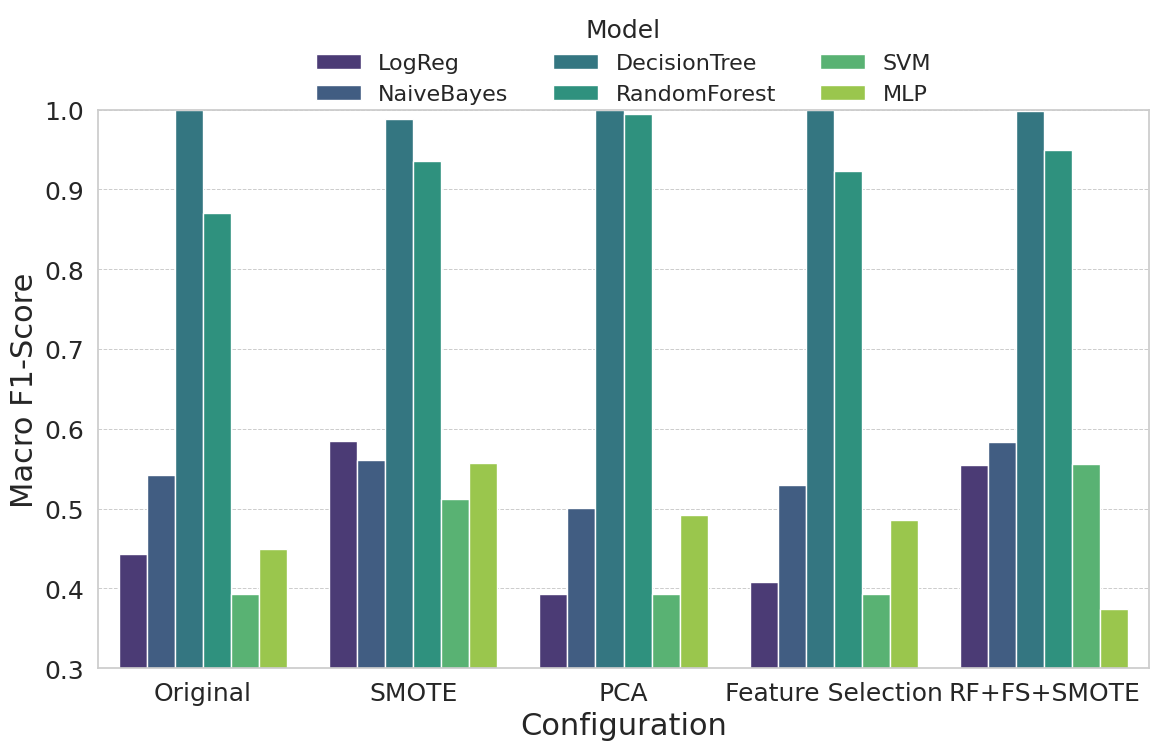

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data
configs = ['Original', 'SMOTE', 'PCA', 'Feature Selection', 'RF+FS+SMOTE']
f1_scores = {
    'LogReg': [0.443, 0.585, 0.393, 0.408, 0.555],
    'NaiveBayes': [0.542, 0.561, 0.501, 0.530, 0.583],
    'DecisionTree': [1.000, 0.988, 1.000, 1.000, 0.998],
    'RandomForest': [0.871, 0.936, 0.994, 0.923, 0.949],
    'SVM': [0.393, 0.512, 0.393, 0.393, 0.556],
    'MLP': [0.450, 0.557, 0.492, 0.486, 0.374],
}

# Convert to DataFrame (long format for seaborn)
df = pd.DataFrame(f1_scores, index=configs).reset_index().melt(id_vars='index')
df.columns = ['Configuration', 'Model', 'Macro F1-Score']

# Plot
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid', font_scale=1.6)

ax = sns.barplot(
    data=df,
    x='Configuration',
    y='Macro F1-Score',
    hue='Model',
    palette='viridis'
)

# Labels and ticks
ax.set_ylabel('Macro F1-Score', fontsize=22)
ax.set_xlabel('Configuration', fontsize=22)
ax.set_ylim(0.3, 1.0)
ax.tick_params(axis='x', rotation=0, labelsize=18)
ax.tick_params(axis='y', labelsize=18)

# Horizontal legend
ax.legend(
    title='Model',
    fontsize=16,
    title_fontsize=18,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.20),
    ncol=3,
    frameon=False
)

# Grid and layout
ax.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


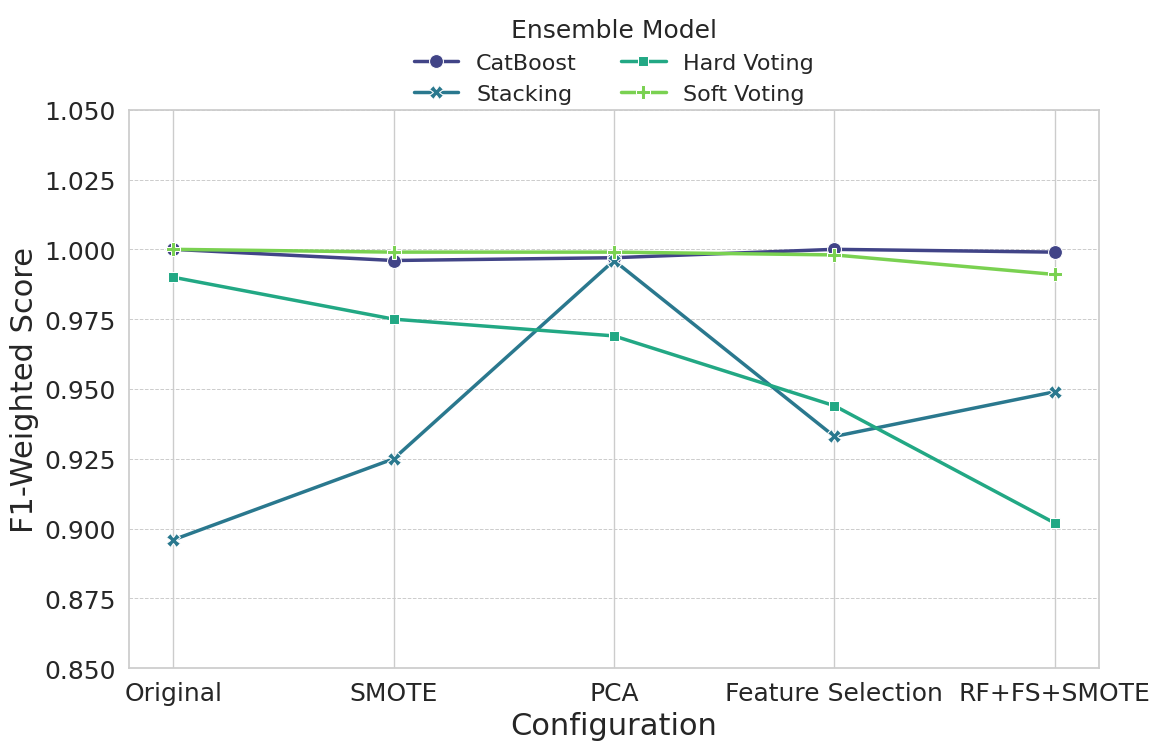

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Datos
configs = ['Original', 'SMOTE', 'PCA', 'Feature Selection', 'RF+FS+SMOTE']
f1_weighted_college = {
    'CatBoost': [1.000, 0.996, 0.997, 1.000, 0.999],
    'Stacking': [0.896, 0.925, 0.996, 0.933, 0.949],
    'Hard Voting': [0.990, 0.975, 0.969, 0.944, 0.902],
    'Soft Voting': [1.000, 0.999, 0.999, 0.998, 0.991],
}

# DataFrame para seaborn
df = pd.DataFrame(f1_weighted_college, index=configs).reset_index().melt(id_vars='index')
df.columns = ['Configuration', 'Model', 'F1-Weighted Score']

# Estética seaborn
sns.set(style='whitegrid', font_scale=1.6)
plt.figure(figsize=(12, 8))

# Plot
ax = sns.lineplot(
    data=df,
    x='Configuration',
    y='F1-Weighted Score',
    hue='Model',
    style='Model',
    markers=True,
    dashes=False,
    linewidth=2.5,
    markersize=10,
    palette='viridis'
)

# Ajustes de ejes
ax.set_ylabel('F1-Weighted Score', fontsize=22)
ax.set_xlabel('Configuration', fontsize=22)
ax.set_ylim(0.85, 1.05)
ax.tick_params(axis='x', rotation=0, labelsize=18)
ax.tick_params(axis='y', labelsize=18)

# Leyenda horizontal
ax.legend(
    title='Ensemble Model',
    fontsize=16,
    title_fontsize=18,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.20),
    ncol=2,
    frameon=False
)

# Grid y layout
ax.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()



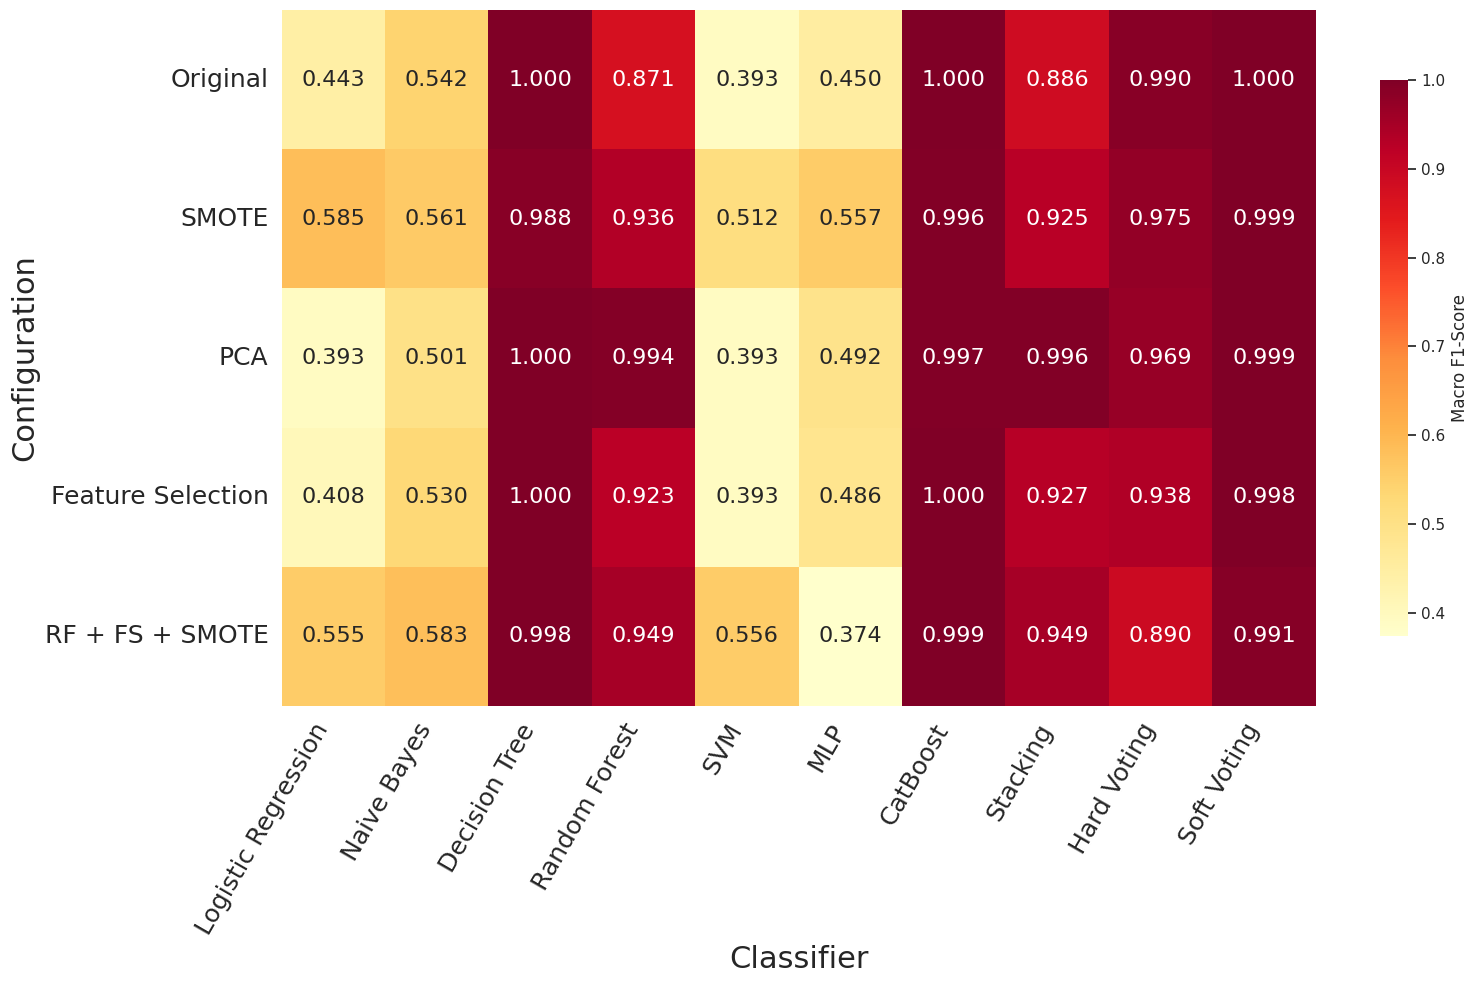

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Datos de F1_macro para College
data_college = {
    'Original': {
        'Logistic Regression': 0.443,
        'Naive Bayes': 0.542,
        'Decision Tree': 1.000,
        'Random Forest': 0.871,
        'SVM': 0.393,
        'MLP': 0.450,
        'CatBoost': 1.000,
        'Stacking': 0.886,
        'Hard Voting': 0.990,
        'Soft Voting': 1.000,
    },
    'SMOTE': {
        'Logistic Regression': 0.585,
        'Naive Bayes': 0.561,
        'Decision Tree': 0.988,
        'Random Forest': 0.936,
        'SVM': 0.512,
        'MLP': 0.557,
        'CatBoost': 0.996,
        'Stacking': 0.925,
        'Hard Voting': 0.975,
        'Soft Voting': 0.999,
    },
    'PCA': {
        'Logistic Regression': 0.393,
        'Naive Bayes': 0.501,
        'Decision Tree': 1.000,
        'Random Forest': 0.994,
        'SVM': 0.393,
        'MLP': 0.492,
        'CatBoost': 0.997,
        'Stacking': 0.996,
        'Hard Voting': 0.969,
        'Soft Voting': 0.999,
    },
    'Feature Selection': {
        'Logistic Regression': 0.408,
        'Naive Bayes': 0.530,
        'Decision Tree': 1.000,
        'Random Forest': 0.923,
        'SVM': 0.393,
        'MLP': 0.486,
        'CatBoost': 1.000,
        'Stacking': 0.927,
        'Hard Voting': 0.938,
        'Soft Voting': 0.998,
    },
    'RF + FS + SMOTE': {
        'Logistic Regression': 0.555,
        'Naive Bayes': 0.583,
        'Decision Tree': 0.998,
        'Random Forest': 0.949,
        'SVM': 0.556,
        'MLP': 0.374,
        'CatBoost': 0.999,
        'Stacking': 0.949,
        'Hard Voting': 0.890,
        'Soft Voting': 0.991,
    }
}

# Crear DataFrame
df_college = pd.DataFrame(data_college).T

# Crear heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(
    df_college,
    annot=True,
    fmt=".3f",
    cmap="YlOrRd",
    cbar_kws={'label': 'Macro F1-Score', 'shrink': 0.8},
    annot_kws={"size": 16}
)

# Ejes
plt.xlabel('Classifier', fontsize=22)
plt.ylabel('Configuration', fontsize=22)
plt.xticks(rotation=60, fontsize=18, ha='right')
plt.yticks(rotation=0, fontsize=18)



# Layout final
plt.tight_layout()

# Guardar figura (opcional)
plt.savefig('college_f1_heatmap.png', dpi=300, bbox_inches='tight')

# Mostrar figura
plt.show()



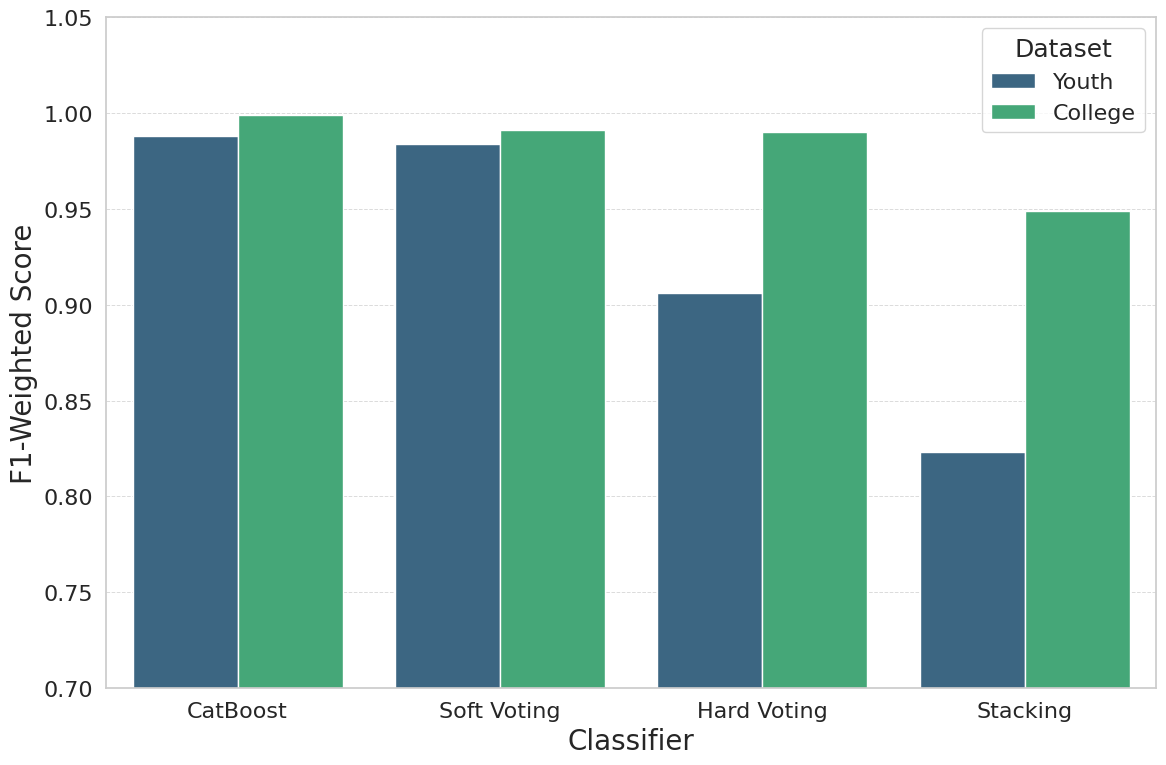

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Datos de F1-weighted para los mejores clasificadores en cada dataset
data_fig21 = pd.DataFrame({
    'Classifier': ['CatBoost', 'Soft Voting', 'Hard Voting', 'Stacking'],
    'Youth': [0.988, 0.984, 0.906, 0.823],
    'College': [0.999, 0.991, 0.990, 0.949]
})

# Reformatear para barplot
df_melted = data_fig21.melt(id_vars='Classifier', var_name='Dataset', value_name='F1-weighted')

# Estética
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 18})

# Plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=df_melted,
    x='Classifier',
    y='F1-weighted',
    hue='Dataset',
    palette='viridis'
)

ax.set_ylabel('F1-Weighted Score', fontsize=20)
ax.set_xlabel('Classifier', fontsize=20)
ax.set_ylim(0.7, 1.05)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

# Leyenda
ax.legend(title='Dataset', fontsize=16, title_fontsize=18, loc='upper right')

# Cuadrícula y espaciado
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

plt.tight_layout()
plt.show()


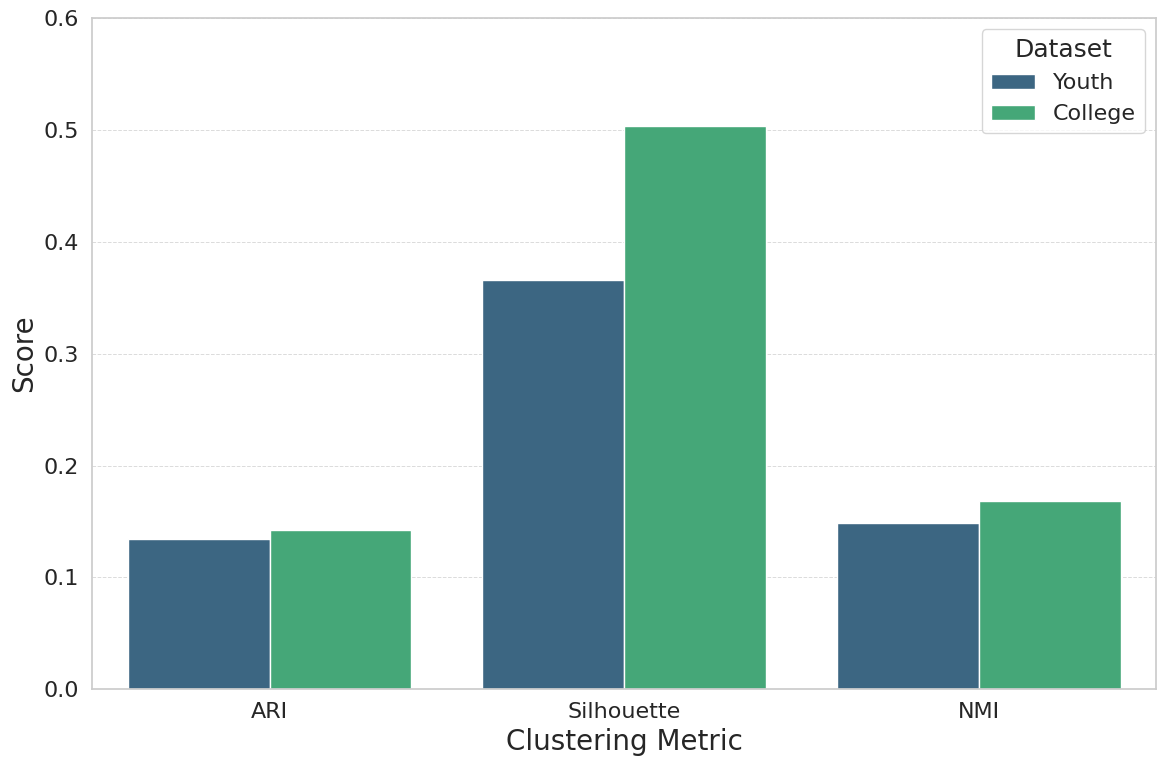

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Datos de métricas de clustering para ambos datasets
data_fig22 = pd.DataFrame({
    'Metric': ['ARI', 'Silhouette', 'NMI'],
    'Youth': [0.1342, 0.3661, 0.1487],     # Mejores resultados GMM + PCA para Youth
    'College': [0.1427, 0.5038, 0.1681]    # Mejores resultados GMM + PCA para College
})

# Reformatear para barplot
df_melted2 = data_fig22.melt(id_vars='Metric', var_name='Dataset', value_name='Score')

# Estética
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 18})

# Plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=df_melted2,
    x='Metric',
    y='Score',
    hue='Dataset',
    palette='viridis'
)

ax.set_ylabel('Score', fontsize=20)
ax.set_xlabel('Clustering Metric', fontsize=20)
ax.set_ylim(0, 0.6)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

# Leyenda horizontal
ax.legend(title='Dataset', fontsize=16, title_fontsize=18, loc='upper right')

# Cuadrícula sutil
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

plt.tight_layout()
plt.show()

